# LAB ATTACK SHARKS
### Laura Ballesteros
### Documento individual del proyecto con Ángel Expósito-

In [1]:
import pandas as pd
from pandas import options
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import re
from sklearn.metrics import confusion_matrix
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

First of all, I will begin by importing the necessary libraries that I am going to use. As the project progresses, I will add the libraries that I will need in that section.

## GATHER AND CLEAN DATA

#### We read the document we want to view

In [2]:
df= pd.read_csv('C:/Users/laura/Desktop/ironhack/Shark-Attack/Shark-Attacks/attacks.csv', encoding="latin1")
df

Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

#### Standardize column names in lower case and separated by hyphens

In [3]:
df.columns = df.columns.str.lower(). str.replace(" ", "_")
df

case_number         date    year        type    country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  area                        location     activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  name sex_  ...         species_  \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               investigator_or_source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href_formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href case_number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

To see each columns, and it if a string or a number, i use df.dtypes

In [4]:
df.dtypes

case_number                object
date                       object
year                      float64
type                       object
country                    object
area                       object
location                   object
activity                   object
name                       object
sex_                       object
age                        object
injury                     object
fatal_(y/n)                object
time                       object
species_                   object
investigator_or_source     object
pdf                        object
href_formula               object
href                       object
case_number.1              object
case_number.2              object
original_order            float64
unnamed:_22                object
unnamed:_23                object
dtype: object

To check the info about the column that we are interested: "df['fatal_(y/n)'].value_counts()"

In [5]:
df['fatal_(y/n)'].value_counts()

N          4293
Y          1388
UNKNOWN      71
 N            7
M             1
2017          1
N             1
y             1
Name: fatal_(y/n), dtype: int64

We only want to keep the columns:'case_number','name', 'area', 'location', 'date', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number.1', 'case_number.2', 'time', 'original_order', 'unnamed:_22','unnamed:_23', 'species_' The another ones, we want to keep because its relevant for the case.

In [6]:
unwanted_columns = ['case_number','name', 'area', 'location', 'date', 'investigator_or_source', 'pdf', 'href_formula', 'href', 'case_number.1', 'case_number.2', 'time', 'original_order', 'unnamed:_22','unnamed:_23', 'species_']
df = df.drop(unwanted_columns, axis=1)
df

year        type    country     activity sex_  age  \
0      2018.0     Boating        USA     Paddling    F   57   
1      2018.0  Unprovoked        USA     Standing    F   11   
2      2018.0     Invalid        USA      Surfing    M   48   
3      2018.0  Unprovoked  AUSTRALIA      Surfing    M  NaN   
4      2018.0    Provoked     MEXICO  Free diving    M  NaN   
...       ...         ...        ...          ...  ...  ...   
25718     NaN         NaN        NaN          NaN  NaN  NaN   
25719     NaN         NaN        NaN          NaN  NaN  NaN   
25720     NaN         NaN        NaN          NaN  NaN  NaN   
25721     NaN         NaN        NaN          NaN  NaN  NaN   
25722     NaN         NaN        NaN          NaN  NaN  NaN   

                                                  injury fatal_(y/n)  
0      No injury to occupant, outrigger canoe and pad...           N  
1                             Minor injury to left thigh           N  
2           Injury to left lower leg from surfboard skeg           N  
3                              Minor injury to lower leg           N  
4      Lacerations to leg & hand shark PROVOKED INCIDENT           N  
...                                                  ...         ...  
25718                                                NaN         NaN  
25719                                                NaN         NaN  
25720                                                NaN         NaN  
25721                                                NaN         NaN  
25722                                                NaN         NaN  

[25723 rows x 8 columns]

#### Remove the duplicates rows

In [7]:
df = df.drop_duplicates()
df

year        type             country      activity sex_  age  \
0     2018.0     Boating                 USA      Paddling    F   57   
1     2018.0  Unprovoked                 USA      Standing    F   11   
2     2018.0     Invalid                 USA       Surfing    M   48   
3     2018.0  Unprovoked           AUSTRALIA       Surfing    M  NaN   
4     2018.0    Provoked              MEXICO   Free diving    M  NaN   
...      ...         ...                 ...           ...  ...  ...   
6298     0.0  Unprovoked           AUSTRALIA  Pearl diving    M  NaN   
6299     0.0  Unprovoked                 USA      Swimming    M  NaN   
6300     0.0  Unprovoked              PANAMA           NaN    M  NaN   
6301     0.0  Unprovoked  CEYLON (SRI LANKA)      Swimming    M   15   
6302     NaN         NaN                 NaN           NaN  NaN  NaN   

                                                 injury fatal_(y/n)  
0     No injury to occupant, outrigger canoe and pad...           N  
1                            Minor injury to left thigh           N  
2          Injury to left lower leg from surfboard skeg           N  
3                             Minor injury to lower leg           N  
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N  
...                                                 ...         ...  
6298                                              FATAL           Y  
6299                                              FATAL           Y  
6300                                              FATAL           Y  
6301  FATAL. "Shark bit him in half, carrying away t...           Y  
6302                                                NaN         NaN  

[6268 rows x 8 columns]

To see the amount of Nans per column:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6268 entries, 0 to 6302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         6265 non-null   float64
 1   type         6263 non-null   object 
 2   country      6217 non-null   object 
 3   activity     5729 non-null   object 
 4   sex_         5706 non-null   object 
 5   age          3468 non-null   object 
 6   injury       6240 non-null   object 
 7   fatal_(y/n)  5730 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.7+ KB


This way we can sum up the Nans per columns:

In [9]:
df.isna().sum()

year              3
type              5
country          51
activity        539
sex_            562
age            2800
injury           28
fatal_(y/n)     538
dtype: int64

 We are going to use the form df[df[""].isna()] to see each columns with the nuns

In [10]:
df[df["type"].isna()]

year type    country           activity sex_  age  \
85    2017.0  NaN      SAMOA            Fishing    M  NaN   
382   2015.0  NaN  AUSTRALIA            Surfing    M   40   
4867  1936.0  NaN    VIETNAM  Wreck of a sampam    M  NaN   
5705  1890.0  NaN     CEYLON             Diving    M  NaN   
6302     NaN  NaN        NaN                NaN  NaN  NaN   

                          injury fatal_(y/n)  
85    Injuries to hands and legs           N  
382               Injury to hand         NaN  
4867                       FATAL           Y  
5705                       FATAL           Y  
6302                         NaN         NaN

To check the information about each columns we use a formula: df[''].value_counts

#### Type

In [11]:
df['type'].value_counts()

Unprovoked      4565
Provoked         573
Invalid          545
Sea Disaster     239
Boating          201
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

The types need to clasified in:
Unprovoked, provoked, sea disaster, boat (boating, boat, boatomg), others (invalid y questionable)

In [12]:
def clean_type(x):
    x = str(x)
    if x.lower().startswith("u"):
        return "unprovoked"
    elif x.lower().startswith("p"):
        return "provoked" 
    elif x.lower().startswith("b"):
        return "boating"
    elif x.lower().startswith("s"):
        return "sea_disaster" 
    else:
        return "others"

In [13]:
df['type'] = df['type'].apply(clean_type)
df['type'].value_counts()

unprovoked      4565
provoked         573
others           552
boating          339
sea_disaster     239
Name: type, dtype: int64

Now I have to clean the nulls and group all the categories into the following classes: Unprovoked, provoked, sea disaster, boat (boating, boat, boatomg), others (invalid and questionable)

I have classified the "types" into these categories, since I consider it important to classify them in that way to be able to group the types of deaths and be able to analyze the probability and correlation they have with shark attacks.

#### We import the option of pandas, and set pandas display option to show all rows, with the follow sentence

In [14]:
options.display.max_rows = None
options.display.max_columns = None

##### --- Now individually, I am going to study how many times each answer is repeated and the number of nulls in each column.

#### Country

In [15]:
print(df['country'])

0                                         USA
1                                         USA
2                                         USA
3                                   AUSTRALIA
4                                      MEXICO
5                                   AUSTRALIA
6                                      BRAZIL
7                                         USA
8                                         USA
9                                         USA
10                                  AUSTRALIA
11                                        USA
12                                        USA
13                                    ENGLAND
14                                  AUSTRALIA
15                               SOUTH AFRICA
16                                  AUSTRALIA
17                                   THAILAND
18                                 COSTA RICA
19                                  AUSTRALIA
20                                  AUSTRALIA
21                                

In [16]:
df["country"] = df["country"].str.lower().str.replace(" ", "_")

In [17]:
df[df["country"].isna()]

year          type country  \
62    2017.0    unprovoked     NaN   
525   2014.0        others     NaN   
2956  1983.0    unprovoked     NaN   
3378  1970.0    unprovoked     NaN   
3387  1970.0        others     NaN   
3388  1970.0    unprovoked     NaN   
3395  1970.0      provoked     NaN   
3399  1970.0    unprovoked     NaN   
3425  1969.0    unprovoked     NaN   
3605  1965.0    unprovoked     NaN   
3661  1964.0        others     NaN   
4018  1960.0  sea_disaster     NaN   
4231  1956.0    unprovoked     NaN   
4266  1956.0  sea_disaster     NaN   
4498  1949.0  sea_disaster     NaN   
4639  1944.0  sea_disaster     NaN   
4700  1942.0  sea_disaster     NaN   
4712  1942.0    unprovoked     NaN   
4726  1942.0  sea_disaster     NaN   
4729  1942.0       boating     NaN   
4911  1935.0    unprovoked     NaN   
5020  1931.0    unprovoked     NaN   
5060  1929.0    unprovoked     NaN   
5425  1909.0        others     NaN   
5586  1898.0    unprovoked     NaN   
5587  1898.0    unprovoked     NaN   
5612  1897.0    unprovoked     NaN   
5636  1895.0    unprovoked     NaN   
5742  1887.0  sea_disaster     NaN   
5770  1885.0    unprovoked     NaN   
5808  1881.0    unprovoked     NaN   
5810  1881.0    unprovoked     NaN   
5839  1878.0    unprovoked     NaN   
5885  1874.0    unprovoked     NaN   
5920  1869.0        others     NaN   
5996  1856.0    unprovoked     NaN   
6001  1855.0    unprovoked     NaN   
6092  1830.0    unprovoked     NaN   
6119  1811.0    unprovoked     NaN   
6131  1801.0      provoked     NaN   
6133  1797.0    unprovoked     NaN   
6137  1787.0    unprovoked     NaN   
6155  1742.0    unprovoked     NaN   
6165  1638.0    unprovoked     NaN   
6171  1555.0    unprovoked     NaN   
6175    77.0    unprovoked     NaN   
6177     0.0    unprovoked     NaN   
6199     0.0      provoked     NaN   
6206     0.0    unprovoked     NaN   
6259     0.0  sea_disaster     NaN   
6302     NaN        others     NaN   

                                               activity sex_  age  \
62                                              Surfing    M   24   
525                                        Sea disaster    M  NaN   
2956                                           Swimming    M  NaN   
3378                                                NaN    M  NaN   
3387        Sea Disaster Sinking of ferryboat Christina  NaN  NaN   
3388                                                NaN    M  NaN   
3395                                         Freediving    M  NaN   
3399                                             Wading    F    8   
3425                                                NaN    M   25   
3605                           The boat Caribou II sank    M   39   
3661                                       Spearfishing    M   24   
4018  Portuguese Airliner with 9 people aboard went ...  NaN  NaN   
4231                              Climbing back on ship    M  NaN   
4266                                          Shipwreck    M  NaN   
4498     Sea Disaster, sinking of the motorship Wingate    M  NaN   
4639  Japanese POW ship Arisan Maru with 1800 Americ...    M  NaN   
4700  Dutch merchant ship Zaandam torpedoed  by the ...    M  NaN   
4712  On life raft tethered to lifeboat. A seaman pu...    M  NaN   
4726  Jumped overboard from torpedoed Panamanian fre...    M  NaN   
4729  Days before the surrender of Singapore, the 3 ...    M  NaN   
4911                                             Diving    F  NaN   
5020                             Fishing, boat capsized    M  NaN   
5060                                                NaN    M   20   
5425                                  Jumped overboard     M   36   
5586                                             Diving    M  NaN   
5587                                             Diving    M  NaN   
5612                                           Swimming    M  NaN   
5636                                             Diving    M  NaN   
5742              Sea disaster

In [18]:
df['country'].value_counts()

usa                                      2219
australia                                1330
south_africa                              579
papua_new_guinea                          133
new_zealand                               128
brazil                                    109
bahamas                                   109
mexico                                     89
italy                                      71
fiji                                       65
philippines                                61
reunion                                    60
new_caledonia                              53
cuba                                       46
mozambique                                 45
spain                                      44
india                                      39
egypt                                      38
japan                                      34
croatia                                    32
panama                                     32
solomon_islands                   

To analyze the "country" column it is necessary to classify all the places where there have been shark attacks, and I will classify them into high risk, medium risk, low risk and low probability. I think it is the right way to use the data in the future.

1. High risk: USA, AUSTRALIA, SOUTH AFRICA  
2. Medium risk: PAPUA NEW GUINEA, NEW ZEALAND, BRAZIL, BAHAMAS, MEXICO, ITALY , FIJI, PHILIPPINES   
3. Less risk: REUNION,NEW CALEDONIA, CUBA, MOZAMBIQUE, SPAIN, INDIA, EGYPT, CROATIA, JAPA,PANAMA,SOLOMON ISLANDS,IRAN, JAMAICA,FRENCH POLYNESIA, GREEC, HONG KONG,INDONESIA, ENGLAND, PACIFIC OCEAN,ATLANTIC OCEAN, COSTA RICA ,BERMUDA, VIETNAM, TONGA, SRI LANKA ,VANUATU ,MARSHALL ISLANDS ,FRANCE,CANADA, SOUTH ATLANTIC OCEAN ,TURKEY, IRAQ ,VENEZUELA ,UNITED KINGDOM,SENEGAL 
4. Low-risk: the rest

In [19]:
country = ["(?:usa|australia|south_africa)","(?:papua_new_guinea|new_zealand|brazil|bahamas|mexico|italy|fiji|philippines)", "(?:reunion|new_caledonia|cuba|mozambique|spain|india|egypt|croatia|japa|panama|solomon|islands|iran|jamaica|french_polynesia|greec|hong_kong|indonesia|england|pacific_ocean|atlantic|ocean|costa_rica|bermuda|vietnam|tonga|sri_lanka|vanuatu|marshall_islands|france|canada|south_atlantic_ocean|turkey|iraq|venezuela|united_kingdom|senegal)"]

def extract_and_clean(data, column_name, words_list):
    extracted_values = {}
    for word in words_list:
        pattern = r'\b\w*{}\w*\b'.format(word)
        extracted_values[word] = data[column_name].apply(lambda x: re.findall(pattern, str(x), flags = re.IGNORECASE))
    series_variables = {}
    for word, values in extracted_values.items():
        series_variables[word] = pd.Series(values, name=word)
    for word, values in series_variables.items():
        series_variables[word] = values.apply(lambda x: x[0] if isinstance(x,list) & (len(x) >= 1) else None)
    indexes_object = {}
    for word, values in series_variables.items():
        indexes_object[word] = values.dropna().index.tolist()
    for word, indexes in indexes_object.items():
        data.loc[indexes, column_name] = word
    
    return series_variables, indexes_object, data


In [20]:
extract_and_clean(df,"country",country)
df['country'].value_counts()

(?:usa|australia|south_africa)                                                                                                                                                                                                                                                                                                                      4128
(?:reunion|new_caledonia|cuba|mozambique|spain|india|egypt|croatia|japa|panama|solomon|islands|iran|jamaica|french_polynesia|greec|hong_kong|indonesia|england|pacific_ocean|atlantic|ocean|costa_rica|bermuda|vietnam|tonga|sri_lanka|vanuatu|marshall_islands|france|canada|south_atlantic_ocean|turkey|iraq|venezuela|united_kingdom|senegal)     910
(?:papua_new_guinea|new_zealand|brazil|bahamas|mexico|italy|fiji|philippines)                                                                                                                                                                                                                                         

In [21]:
def others_countries(x):
    if x == "(?:usa|australia|south_africa)":
        return "High_risk"
    elif x == "(?:reunion|new_caledonia|cuba|mozambique|spain|india|egypt|croatia|japa|panama|solomon|islands|iran|jamaica|french_polynesia|greec|hong_kong|indonesia|england|pacific_ocean|atlantic|ocean|costa_rica|bermuda|vietnam|tonga|sri_lanka|vanuatu|marshall_islands|france|canada|south_atlantic_ocean|turkey|iraq|venezuela|united_kingdom|senegal)":
        return "Medium-risk"
    elif x == "(?:papua_new_guinea|new_zealand|brazil|bahamas|mexico|italy|fiji|philippines)":
        return "Less-risk"
    else:
        return "low_probability"

In [22]:
df['country'] = df['country'].apply(others_countries)
df['country'].value_counts()

High_risk          4128
Medium-risk         910
Less-risk           767
low_probability     463
Name: country, dtype: int64

Now I have all the values clean and classified into the categories that we see.

By having the countries classified in this way, we can see if the areas have a correlation with the fatality of the attacks, the increase in these, or any possible relationship.

#### Year

In [23]:
df.dtypes

year           float64
type            object
country         object
activity        object
sex_            object
age             object
injury          object
fatal_(y/n)     object
dtype: object

In [24]:
df = df[df["year"].notna()]
df

year          type          country  \
0     2018.0       boating        High_risk   
1     2018.0    unprovoked        High_risk   
2     2018.0        others        High_risk   
3     2018.0    unprovoked        High_risk   
4     2018.0      provoked        Less-risk   
5     2018.0    unprovoked        High_risk   
6     2018.0    unprovoked        Less-risk   
7     2018.0    unprovoked        High_risk   
8     2018.0    unprovoked        High_risk   
9     2018.0    unprovoked        High_risk   
10    2018.0      provoked        High_risk   
11    2018.0    unprovoked        High_risk   
12    2018.0    unprovoked        High_risk   
13    2018.0        others      Medium-risk   
14    2018.0      provoked        High_risk   
15    2018.0    unprovoked        High_risk   
16    2018.0        others        High_risk   
17    2018.0    unprovoked  low_probability   
18    2018.0    unprovoked      Medium-risk   
19    2018.0    unprovoked        High_risk   
20    2018.0        others        High_risk   
21    2018.0    unprovoked        High_risk   
22    2018.0    unprovoked        High_risk   
23    2018.0    unprovoked  low_probability   
24    2018.0    unprovoked        High_risk   
25    2018.0    unprovoked        High_risk   
26    2018.0    unprovoked  low_probability   
27    2018.0    unprovoked        Less-risk   
28    2018.0    unprovoked        High_risk   
29    2018.0    unprovoked        High_risk   
30    2018.0    unprovoked        Less-risk   
31    2018.0        others        Less-risk   
32    2018.0    unprovoked      Medium-risk   
33    2018.0    unprovoked        Less-risk   
34    2018.0    unprovoked        High_risk   
35    2018.0    unprovoked        High_risk   
36    2018.0    unprovoked        High_risk   
37    2018.0    unprovoked        High_risk   
38    2018.0    unprovoked        High_risk   
39    2018.0    unprovoked        High_risk   
40    2018.0    unprovoked        High_risk   
41    2018.0      provoked        High_risk   
42    2018.0    unprovoked        High_risk   
43    2018.0        others        High_risk   
44    2018.0        others        Less-risk   
45    2018.0    unprovoked  low_probability   
46    2018.0        others        High_risk   
47    2018.0    unprovoked        High_risk   
48    2018.0    unprovoked      Medium-risk   
49    2018.0    unprovoked        High_risk   
50    2018.0    unprovoked        High_risk   
51    2018.0    unprovoked        Less-risk   
52    2018.0    unprovoked        High_risk   
53    2017.0    unprovoked        High_risk   
54    2017.0    unprovoked        High_risk   
55    2017.0      provoked  low_probability   
56    2017.0    unprovoked        Less-risk   
57    2017.0    unprovoked      Medium-risk   
58    2017.0    unprovoked      Medium-risk   
59    2017.0  sea_disaster  low_probability   
60    2017.0    unprovoked        High_risk   
61    2017.0    unprovoked        High_risk   
62    2017.0    unprovoked  low_probability   
63    2017.0    unprovoked        High_risk   
64    2017.0    unprovoked      Medium-risk   
65    2017.0    unprovoked        High_risk   
66    2017.0    unprovoked        High_risk   
67    2017.0    unprovoked        High_risk   
68    2017.0    unprovoked  low_probability   
69    2017.0    unprovoked        High_risk   
70    2017.0    unprovoked        High_risk   
71    2017.0    unprovoked        High_risk   
72    2017.0    unprovoked        Less-risk   
73    2017.0    unprovoked        High_risk   
74    2017.0    unprovoked        High_risk   
75    2017.0    unprovoked        High_risk   
76    2017.0        others        High_risk   
77    2017.0    unprovoked        High_risk   
78    2017.0    unprovoked        High_risk   
79    2017.0        others        High_risk   
80    2017.0    unprovoked        High_risk   
81    2017.0    unprovoked        High_risk   
82    2017.0    unprovoked      Medium-risk   
83    2017.0    unprovoked        High_risk   
84    2017.0 

In [25]:
df['year'].value_counts()

2015.0    143
2017.0    135
2016.0    130
2011.0    128
2014.0    126
0.0       123
2013.0    122
2008.0    122
2009.0    119
2012.0    117
2007.0    112
2006.0    103
2005.0    103
2010.0    101
2000.0     94
1959.0     93
2001.0     92
1960.0     92
2004.0     92
2003.0     91
2002.0     88
1962.0     86
1961.0     78
1995.0     75
1999.0     66
1964.0     65
1998.0     65
1996.0     61
1963.0     61
1966.0     58
1997.0     57
1993.0     56
1992.0     55
1988.0     55
1958.0     54
1994.0     54
2018.0     53
1989.0     53
1965.0     51
1983.0     50
1956.0     50
1975.0     49
1981.0     49
1967.0     48
1968.0     46
1955.0     43
1950.0     43
1954.0     42
1970.0     42
1942.0     41
1984.0     41
1957.0     40
1982.0     40
1986.0     39
1976.0     39
1974.0     38
1990.0     38
1991.0     38
1929.0     38
1985.0     37
1953.0     36
1987.0     35
1980.0     35
1972.0     34
1936.0     32
1935.0     32
1951.0     32
1944.0     31
1949.0     31
1937.0     30
1969.0     30
1947.0

For "year" I have considered it necessary to maintain it since we can obtain information about those years where the most attacks have been recorded, taking into account, obviously, as a result of society recording everything that happened, we will have more information in the last decades and will be more reliable than that information obtained hundreds and thousands of years ago.

#### Area

#### location

Once AREA, LOCATION AND COUNTRY have been analyzed, I consider that the most relevant information, and at the same time, the most complete (with fewer nulls) is that corresponding to the COUNTRY category, so I consider that we should discard the area and location columns and Let's just keep with country.

#### activity

In [26]:
df[df["activity"].isna()]

year          type          country activity sex_            age  \
47    2018.0    unprovoked        High_risk      NaN    M             18   
108   2017.0    unprovoked        High_risk      NaN    F             12   
112   2017.0    unprovoked        High_risk      NaN    F            NaN   
114   2017.0    unprovoked        High_risk      NaN    F             40   
154   2017.0    unprovoked        High_risk      NaN  NaN            NaN   
182   2017.0    unprovoked        High_risk      NaN    M           Teen   
185   2017.0    unprovoked        High_risk      NaN    M            NaN   
245   2016.0    unprovoked        High_risk      NaN    F             11   
255   2016.0    unprovoked        High_risk      NaN    M             35   
289   2016.0        others  low_probability      NaN    M             60   
294   2016.0    unprovoked        High_risk      NaN    M           Teen   
296   2016.0      provoked        Less-risk      NaN    M              9   
300   2016.0    unprovoked        High_risk      NaN    M             12   
368   2015.0    unprovoked        High_risk      NaN    M            NaN   
373   2015.0        others        High_risk      NaN    M            NaN   
394   2015.0    unprovoked        High_risk      NaN    M             32   
414   2015.0    unprovoked        High_risk      NaN    F            NaN   
424   2015.0    unprovoked        High_risk      NaN    M             30   
462   2015.0    unprovoked        High_risk      NaN    M             12   
465   2014.0  sea_disaster      Medium-risk      NaN  NaN            NaN   
475   2014.0       boating        High_risk      NaN  NaN            NaN   
507   2014.0        others        High_risk      NaN  NaN            NaN   
516   2014.0    unprovoked        High_risk      NaN    M             26   
576   2014.0        others        High_risk      NaN    F             10   
624   2013.0    unprovoked        High_risk      NaN    F            NaN   
628   2013.0      provoked        High_risk      NaN    M              3   
629   2013.0    unprovoked        Less-risk      NaN    M            NaN   
660   2013.0        others      Medium-risk      NaN    M             20   
673   2013.0    unprovoked        Less-risk      NaN    M             41   
685   2013.0    unprovoked  low_probability      NaN    M             40   
688   2013.0        others        High_risk      NaN    M             24   
705   2013.0    unprovoked      Medium-risk      NaN    M             18   
721   2012.0        others        High_risk      NaN    M             20   
729   2012.0    unprovoked        High_risk      NaN    F             35   
732   2012.0        others        High_risk      NaN    M            NaN   
761   2012.0        others        High_risk      NaN    M             12   
802   2012.0    unprovoked        High_risk      NaN    M            NaN   
829   2011.0    unprovoked        High_risk      NaN    M            NaN   
858   2011.0    unprovoked        High_risk      NaN    M             29   
878   2011.0    unprovoked        High_risk      NaN    M             10   
882   2011.0        others        High_risk      NaN    M             12   
940   2011.0        others      Medium-risk      NaN    F            NaN   
993   2010.0    unprovoked      Medium-risk      NaN    M             34   
1053  2010.0    unprovoked      Medium-risk      NaN    F            NaN   
1054  2010.0    unprovoked      Medium-risk      NaN    M            NaN   
1088  2009.0    unprovoked      Medium-risk      NaN    M            NaN   
1090  2009.0      provoked        Less-risk      NaN    M             34   
1130  2009.0    unprovoked        High_risk      NaN    F            NaN   
1162  2009.0        others        Less-risk      NaN    M             17   
1170  2009.0    unprovoked        High_risk      NaN  NaN            NaN   
1190  2008.0    unprovoked  low_probability      NaN    F            NaN   
1219  2008.0        others        High_risk      NaN    

In [27]:
df['activity'].value_counts()

Surfing                                                                                                                                                                                                                                                           965
Swimming                                                                                                                                                                                                                                                          857
Fishing                                                                                                                                                                                                                                                           429
Spearfishing                                                                                                                                                                                                          

surf
swim(bath)
fish
div (snork)
act_acuaticas(?)(board, paddl, playing, kayak,can)
otros(wading, resto)

In [28]:
activity = df["activity"]

def extract_fish_words(x):
    x = str(x)
    patter = r'\b\w*fish\w*\b'
    fish_words = re.findall(patter, x, flags = re.IGNORECASE)
    return fish_words

def extract_swim_words(x):
    x = str(x)
    patter = r'\b\w*(?:swim|bath)\w*\b'
    swim_words = re.findall(patter, x, flags = re.IGNORECASE)
    return swim_words

def extract_surf_words(x):
    x = str(x)
    patter = r'\b\w*surf\w*\b'
    surf_words = re.findall(patter, x, flags = re.IGNORECASE)
    return surf_words

def extract_div_words(x):
    x = str(x)
    patter = r'\b\w*(?:div|snork)\w*\b'
    div_words = re.findall(patter, x, flags = re.IGNORECASE)
    return div_words

def extract_activities_words(x):
    x = str(x)
    patter = r'\b\w*(?:boat|board|kayak|sail|canoe|padd)\w*\b'
    activities_words = re.findall(patter, x, flags = re.IGNORECASE)
    return activities_words

def extract_others_words(x):
    x = str(x)
    others_words = re.findall(patter, x, flags = re.IGNORECASE)
    return others_words

In [29]:
fishing = activity.apply(extract_fish_words)
swimming = activity.apply(extract_swim_words)
surfing = activity.apply(extract_surf_words)
diving = activity.apply(extract_div_words)
activities = activity.apply(extract_activities_words)

In [30]:
def clean_fish(x):
    if isinstance(x, list) & len (x) > 0:
        return "fishing"
    return x
def clean_swim(x):
    if isinstance(x, list) & len (x) > 0:
        return "swimming"
    return x
def clean_surf(x):
    if isinstance(x, list) & len (x) > 0:
        return "surfing"
    return x
def clean_div(x):
    if isinstance(x, list) & len (x) > 0:
        return "diving"
    return x
def clean_activities(x):
    if isinstance(x, list) & len (x) > 0:
        return "activities"
    return x
def others(x):
    feat = ["fishing", "diving", "swimming", "surfing", "activities"]
    if x in feat:
        return x
    else:
        return "others"
    
fishing = fishing.apply(clean_fish)
fish_index = fishing [fishing.values == "fishing"].index
df.loc[fish_index, "activity"] = "fishing"

swimming = swimming.apply(clean_swim)
swim_index = swimming [swimming.values == "swimming"].index
df.loc[swim_index, "activity"] = "swimming"

surfing = surfing.apply(clean_surf)
surf_index = surfing [surfing.values == "surfing"].index
df.loc[surf_index, "activity"] = "surfing"

diving = diving.apply(clean_div)
div_index = diving [diving.values == "diving"].index
df.loc[div_index, "activity"] = "diving"

activities = activities.apply(clean_activities)
activities_index = activities[activities.values == "activities"].index
df.loc[activities_index, "activity"] = "activities"


df["activity"].value_counts()

swimming                                                                                                                                                                                                  1220
surfing                                                                                                                                                                                                   1170
fishing                                                                                                                                                                                                   1013
diving                                                                                                                                                                                                     690
activities                                                                                                                                                                  

In [31]:
df["activity"] = df["activity"].apply(others)
df["activity"].value_counts()

others        1580
swimming      1220
surfing       1170
fishing       1013
diving         690
activities     592
Name: activity, dtype: int64

In the "activity" column there is a lot of variety and a large amount of information, as in the previous ones, I am going to clean out the nulls and classify the categories into others, swimming, surfing, fishing, diving, activities.

For "activities", im going to agrupated the next words: boat|board|kayak|sail|canoe|padd. For diving: div and boat, to swim: swim and bath.


This column is important, since we can obtain information if it correlate with fatality.

#### sex_

In [32]:
df[df["sex_"].isna()]

year          type          country    activity sex_              age  \
32    2018.0    unprovoked      Medium-risk     surfing  NaN              NaN   
59    2017.0  sea_disaster  low_probability  activities  NaN              NaN   
86    2017.0       boating        High_risk     fishing  NaN              NaN   
124   2017.0        others  low_probability     fishing  NaN              NaN   
154   2017.0    unprovoked        High_risk      others  NaN              NaN   
179   2017.0       boating        High_risk      others  NaN              NaN   
218   2016.0       boating        High_risk     fishing  NaN              NaN   
226   2016.0        others        Less-risk      diving  NaN              NaN   
243   2016.0       boating        High_risk      others  NaN              NaN   
297   2016.0        others        High_risk     surfing  NaN              NaN   
326   2015.0       boating        High_risk     fishing  NaN              NaN   
446   2015.0       boating      Medium-risk      others  NaN              NaN   
463   2014.0    unprovoked        High_risk     surfing  NaN              NaN   
465   2014.0  sea_disaster      Medium-risk      others  NaN              NaN   
466   2014.0        others        High_risk    swimming  NaN              NaN   
475   2014.0       boating        High_risk      others  NaN              NaN   
507   2014.0        others        High_risk      others  NaN              NaN   
513   2014.0    unprovoked        High_risk  activities  NaN              NaN   
529   2014.0    unprovoked      Medium-risk      others  NaN              NaN   
560   2014.0    unprovoked        High_risk      diving  NaN              NaN   
565   2014.0       boating        High_risk      others  NaN              NaN   
589   2014.0       boating        Less-risk      others  NaN              NaN   
701   2013.0    unprovoked        High_risk     surfing  NaN              NaN   
740   2012.0    unprovoked        High_risk     surfing  NaN               19   
747   2012.0      provoked        High_risk     fishing  NaN              NaN   
753   2012.0       boating        High_risk     fishing  NaN              NaN   
771   2012.0        others      Medium-risk    swimming  NaN               60   
805   2012.0       boating        High_risk     fishing  NaN              NaN   
818   2012.0       boating        High_risk     fishing  NaN              NaN   
820   2012.0    unprovoked        High_risk      diving  NaN              NaN   
839   2011.0        others        High_risk     fishing  NaN              NaN   
849   2011.0      provoked        High_risk      diving  NaN              NaN   
870   2011.0    unprovoked        High_risk     surfing  NaN              NaN   
911   2011.0       boating      Medium-risk     fishing  NaN              NaN   
956   2011.0       boating        High_risk     fishing  NaN              NaN   
1067  2009.0       boating        High_risk      others  NaN              NaN   
1164  2009.0       boating        Less-risk     fishing  NaN              NaN   
1170  2009.0    unprovoked        High_risk      others  NaN              NaN   
1174  2009.0       boating        Less-risk     fishing  NaN              NaN   
1177  2009.0    unprovoked      Medium-risk     fishing  NaN              NaN   
1178  2008.0        others        High_risk      others  NaN              NaN   
1179  2008.0       boating        High_risk      others  NaN              NaN   
1186  2008.0       boating        High_risk     fishing  NaN              NaN   
1251  2008.0       boating  low_probability     fishing  NaN              NaN   
1277  2008.0    unprovoked        High_risk     surfing  NaN              NaN   
1296  2008.0       boating        Less-risk      others  NaN              NaN   
1366  2007.0        others      Medium-risk      others  NaN              NaN   
1384  2007.0  sea_disaster  low_probability      others  NaN              NaN   
1389  2007.0       boating        High_

In [33]:
df['sex_'].value_counts()

M      5064
F       634
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

In [34]:
def clean_sex_(x):
    x = str(x)
    if x.lower().startswith('m'):
        return "male"
    elif x.lower().startswith('f'):
        return "female"
    else:
        return "male"

In [35]:
df['sex_'] = df['sex_'].apply(clean_sex_)
df['sex_'].value_counts()

male      5631
female     634
Name: sex_, dtype: int64

With the sex column I have grouped into women and men, the null values eliminated and those "unknown" values have been added to the majority values, that is, to the 'Male'

This column is important, since we can obtain information if sex and age correlate with fatality.

#### age

In [36]:
df[df["age"].isna()]

year          type          country    activity    sex_  age  \
3     2018.0    unprovoked        High_risk     surfing    male  NaN   
4     2018.0      provoked        Less-risk      diving    male  NaN   
5     2018.0    unprovoked        High_risk     surfing    male  NaN   
15    2018.0    unprovoked        High_risk     surfing    male  NaN   
16    2018.0        others        High_risk     surfing    male  NaN   
17    2018.0    unprovoked  low_probability    swimming    male  NaN   
19    2018.0    unprovoked        High_risk     surfing    male  NaN   
20    2018.0        others        High_risk     surfing    male  NaN   
22    2018.0    unprovoked        High_risk     surfing    male  NaN   
30    2018.0    unprovoked        Less-risk     surfing    male  NaN   
32    2018.0    unprovoked      Medium-risk     surfing    male  NaN   
43    2018.0        others        High_risk    swimming  female  NaN   
49    2018.0    unprovoked        High_risk      diving    male  NaN   
52    2018.0    unprovoked        High_risk     surfing    male  NaN   
59    2017.0  sea_disaster  low_probability  activities    male  NaN   
67    2017.0    unprovoked        High_risk  activities    male  NaN   
68    2017.0    unprovoked  low_probability    swimming    male  NaN   
72    2017.0    unprovoked        Less-risk  activities    male  NaN   
73    2017.0    unprovoked        High_risk    swimming    male  NaN   
77    2017.0    unprovoked        High_risk     surfing    male  NaN   
78    2017.0    unprovoked        High_risk     surfing    male  NaN   
80    2017.0    unprovoked        High_risk     surfing    male  NaN   
81    2017.0    unprovoked        High_risk     surfing    male  NaN   
85    2017.0        others  low_probability     fishing    male  NaN   
86    2017.0       boating        High_risk     fishing    male  NaN   
88    2017.0    unprovoked        High_risk    swimming    male  NaN   
90    2017.0    unprovoked      Medium-risk     fishing    male  NaN   
91    2017.0    unprovoked        High_risk    swimming    male  NaN   
93    2017.0    unprovoked        High_risk    swimming    male  NaN   
94    2017.0    unprovoked        High_risk    swimming  female  NaN   
99    2017.0    unprovoked        Less-risk  activities    male  NaN   
101   2017.0    unprovoked        Less-risk     fishing    male  NaN   
105   2017.0       boating        High_risk  activities    male  NaN   
109   2017.0    unprovoked        Less-risk      diving  female  NaN   
110   2017.0    unprovoked        Less-risk     fishing    male  NaN   
112   2017.0    unprovoked        High_risk      others  female  NaN   
113   2017.0    unprovoked      Medium-risk    swimming  female  NaN   
118   2017.0    unprovoked        High_risk     surfing    male  NaN   
119   2017.0    unprovoked        High_risk     surfing    male  NaN   
120   2017.0       boating        High_risk  activities    male  NaN   
124   2017.0        others  low_probability     fishing    male  NaN   
125   2017.0        others        High_risk     fishing    male  NaN   
127   2017.0    unprovoked        High_risk     surfing    male  NaN   
131   2017.0    unprovoked      Medium-risk     surfing    male  NaN   
132   2017.0    unprovoked        Less-risk      others  female  NaN   
134   2017.0    unprovoked        High_risk     surfing  female  NaN   
137   2017.0    unprovoked        High_risk     fishing    male  NaN   
140   2017.0    unprovoked        High_risk      others    male  NaN   
146   2017.0    unprovoked        High_risk    swimming  female  NaN   
151   2017.0        others        High_risk      others  female  NaN   
153   2017.0        others        High_risk    swimming    male  NaN   
154   2017.0    unprovoked        High_risk      others    male  NaN   
158   2017.0    unprovoked        High_risk     surfing  female  NaN   
172   2017.0    unprovoked        High_risk      diving  female  NaN   
173   2017.0    unprovoked        High_risk     

In [37]:
df['age'].value_counts()

17                         152
18                         150
19                         142
20                         141
15                         139
16                         138
21                         118
22                         117
25                         108
24                         106
14                         101
13                          94
26                          83
28                          80
23                          80
29                          78
27                          78
30                          76
12                          73
32                          69
35                          68
40                          56
10                          56
31                          52
34                          50
38                          48
33                          44
36                          43
43                          43
37                          42
39                          38
41                          38
42      

In [38]:
import re

def extract_age(x):
    x = str(x)
    ages = re.findall(r'\d+', x)
    ages = [int(age) for age in ages]
    return ages

In [39]:
ages_values = df["age"].apply(extract_age)
ages_values.value_counts()

[]                      2828
[17]                     152
[20]                     151
[18]                     151
[19]                     143
[15]                     139
[16]                     138
[21]                     119
[22]                     117
[25]                     108
[24]                     106
[14]                     102
[13]                      94
[30]                      85
[26]                      83
[28]                      81
[23]                      80
[29]                      78
[27]                      78
[12]                      73
[32]                      69
[35]                      68
[40]                      59
[10]                      56
[31]                      52
[34]                      50
[38]                      48
[33]                      45
[43]                      44
[36]                      43
[37]                      42
[39]                      38
[42]                      38
[11]                      38
[41]          

In [40]:
def only_age(x):
    if isinstance(x, list) and len(x) >= 1:
        return x[0]

In [41]:
ages_values = ages_values.apply(only_age)
df["age"] = ages_values
age_notna = df["age"][df["age"].notna()]


In [42]:
age_column = df["age"]
missing = age_column.isnull()

X_train = age_column[~missing].index.values.reshape(-1,1)
y_train = age_column.dropna()

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [43]:
X_missing = age_column[missing].index.values.reshape(-1,1)
prediction = regression.predict(X_missing)

In [44]:
prediction = prediction.astype(int)
prediction

array([32, 32, 32, ..., 20, 20, 20])

In [45]:
age_column[missing]= prediction

In [46]:
df["age"] = age_column
df.isna().sum()

year             0
type             0
country          0
activity         0
sex_             0
age              0
injury          27
fatal_(y/n)    536
dtype: int64

In [47]:
df.isna().sum()

year             0
type             0
country          0
activity         0
sex_             0
age              0
injury          27
fatal_(y/n)    536
dtype: int64

Over the years, since there are many cases with several years, with averages and even non-specific ages, so, in addition to eliminating the nulls, I have kept the first value of each row.

#### injury

In [48]:
df[df["injury"].isna()]

year          type          country  activity  sex_   age injury  \
1270  2008.0    unprovoked        High_risk    others  male  29.0    NaN   
1366  2007.0        others      Medium-risk    others  male  29.0    NaN   
2250  1997.0    unprovoked        Less-risk  swimming  male  27.0    NaN   
2267  1996.0    unprovoked        High_risk   surfing  male  18.0    NaN   
2648  1990.0    unprovoked        High_risk   surfing  male  17.0    NaN   
3038  1981.0    unprovoked        Less-risk    diving  male  26.0    NaN   
3207  1975.0        others        High_risk   surfing  male  25.0    NaN   
3298  1973.0    unprovoked        High_risk    others  male  21.0    NaN   
3434  1969.0    unprovoked  low_probability   surfing  male  18.0    NaN   
3457  1968.0        others        High_risk   surfing  male  25.0    NaN   
3712  1964.0    unprovoked        High_risk    others  male  24.0    NaN   
3838  1962.0       boating        Less-risk   fishing  male  24.0    NaN   
3841  1962.0    unprovoked      Medium-risk    others  male  16.0    NaN   
4060  1959.0       boating        High_risk    others  male  24.0    NaN   
4517  1949.0       boating        High_risk    others  male  23.0    NaN   
4976  1932.0  sea_disaster      Medium-risk    others  male  22.0    NaN   
5370  1912.0        others        High_risk    others  male  21.0    NaN   
5547  1901.0        others  low_probability    diving  male  21.0    NaN   
5965  1862.0        others        Less-risk    others  male  20.0    NaN   
6140  1784.0    unprovoked      Medium-risk  swimming  male  20.0    NaN   
6153  1755.0    unprovoked  low_probability    others  male  20.0    NaN   
6165  1638.0    unprovoked  low_probability    others  male  20.0    NaN   
6166  1637.0    unprovoked      Medium-risk    others  male  20.0    NaN   
6167  1617.0    unprovoked      Medium-risk    others  male  20.0    NaN   
6171  1555.0    unprovoked  low_probability  swimming  male  20.0    NaN   
6172  1554.0    unprovoked      Medium-risk    others  male  20.0    NaN   
6277     0.0    unprovoked        High_risk    others  male  20.0    NaN   

     fatal_(y/n)  
1270     UNKNOWN  
1366         NaN  
2250     UNKNOWN  
2267     UNKNOWN  
2648     UNKNOWN  
3038     UNKNOWN  
3207         NaN  
3298     UNKNOWN  
3434     UNKNOWN  
3457         NaN  
3712     UNKNOWN  
3838     UNKNOWN  
3841     UNKNOWN  
4060     UNKNOWN  
4517     UNKNOWN  
4976     UNKNOWN  
5370         NaN  
5547         NaN  
5965         NaN  
6140           Y  
6153     UNKNOWN  
6165     UNKNOWN  
6166     UNKNOWN  
6167     UNKNOWN  
6171     UNKNOWN  
6172     UNKNOWN  
6277     UNKNOWN

Classifications I will create:
1. Not survived
2. injuries (bitten, amputated, severed, lacerations)
3. No injury
4. Others

In [49]:
df['injury'].value_counts()

FATAL                                                                                                                                                                                                                                          782
Survived                                                                                                                                                                                                                                        93
Foot bitten                                                                                                                                                                                                                                     87
No injury                                                                                                                                                                                                                                       81
Leg bitten                  

In [50]:
activity = df["injury"]

def extract_not_survived_words(x):
    x = str(x)
    patter = r'\b\w*(?:not_survived|fatal)\w*\b'
    not_survived_words = re.findall(patter, x, flags = re.IGNORECASE)
    return not_survived_words

def extract_injuries_words(x):
    x = str(x)
    patter = r'\b\w*(?:bit|lacer|amput|minor_inj|sever)\w*\b'
    injuries_words = re.findall(patter, x, flags = re.IGNORECASE)
    return injuries_words

def extract_no_injuries_words(x):
    x = str(x)
    patter = r'\b\w*(?:no_inj|boa)\w*\b'
    no_injuries_words = re.findall(patter, x, flags = re.IGNORECASE)
    return no_injuries_words

def extract_others_words(x):
    x = str(x)
    others_words = re.findall(patter, x, flags = re.IGNORECASE)
    return others_words

In [51]:
not_survived = activity.apply(extract_not_survived_words)
injuries = activity.apply(extract_injuries_words)
no_injuries = activity.apply(extract_no_injuries_words)

In [52]:
def clean_not_survived(x):
    if isinstance(x, list) & len (x) > 0:
        return "not_survived"
    return x
def clean_injuries(x):
    if isinstance(x, list) & len (x) > 0:
        return "injuries"
    return x
def clean_no_injuries(x):
    if isinstance(x, list) & len (x) > 0:
        return "no_injuries"
    return x

def others(x):
    feat = ["not_survived", "injuries", "no_injuries"]
    if x in feat:
        return x
    else:
        return "others"
    
not_survived = not_survived.apply(clean_not_survived)
not_survived_index = not_survived [not_survived.values == "not_survived"].index
df.loc[not_survived_index, "injury"] = "not_survived"

injuries = injuries.apply(clean_injuries)
injuries_index = injuries [injuries.values == "injuries"].index
df.loc[injuries_index, "injury"] = "injuries"

no_injuries = no_injuries.apply(clean_no_injuries)
no_injuries_index = no_injuries [no_injuries.values == "no_injuries"].index
df.loc[no_injuries_index, "injury"] = "no_injuries"

df["injury"].value_counts()

injuries                                                                                                                                                                                                     2945
not_survived                                                                                                                                                                                                 1056
no_injuries                                                                                                                                                                                                   469
Survived                                                                                                                                                                                                       93
No injury                                                                                                                                                       

In [53]:
df["injury"] = df["injury"].apply(others)
df["injury"].value_counts()

injuries        2945
others          1795
not_survived    1056
no_injuries      469
Name: injury, dtype: int64

As in the previous ones, it is a database with many null values and values that we do not need, so I am going to classify all the data into 4 classifications to be able to study them later.

This column is important since it analyzes the areas attacked by sharks, since it is very difficult to classify the attacks in areas of the body, since there are many null values and many that are of no use to us, I have decided to classify them as fatal, non-fatal, without injuries and injuries.

#### fatal_(y/n)

In [54]:
df[df["fatal_(y/n)"].isna()]

year          type          country    activity    sex_   age  \
27    2018.0    unprovoked        Less-risk    swimming    male  34.0   
76    2017.0        others        High_risk      diving    male  31.0   
79    2017.0        others        High_risk     surfing    male  33.0   
84    2017.0        others        High_risk      diving    male  25.0   
98    2017.0        others      Medium-risk    swimming  female  11.0   
107   2017.0        others        High_risk    swimming    male  10.0   
115   2017.0        others        High_risk    swimming  female   8.0   
124   2017.0        others  low_probability     fishing    male  31.0   
125   2017.0        others        High_risk     fishing    male  31.0   
145   2017.0        others        High_risk     surfing  female  18.0   
151   2017.0        others        High_risk      others  female  31.0   
153   2017.0        others        High_risk    swimming    male  31.0   
159   2017.0        others        High_risk      diving    male  68.0   
189   2017.0        others        High_risk      others    male  20.0   
195   2016.0        others        High_risk     surfing    male  19.0   
206   2016.0        others        Less-risk      diving    male  31.0   
226   2016.0        others        Less-risk      diving    male  31.0   
265   2016.0        others        High_risk     surfing    male  27.0   
269   2016.0    unprovoked        High_risk     fishing    male  31.0   
289   2016.0        others  low_probability      others    male  60.0   
291   2016.0        others        High_risk      others    male  31.0   
294   2016.0    unprovoked        High_risk      others    male  31.0   
297   2016.0        others        High_risk     surfing    male  31.0   
306   2016.0        others      Medium-risk      others    male  65.0   
307   2016.0        others        High_risk     surfing    male  31.0   
334   2015.0        others        High_risk     surfing  female   9.0   
344   2015.0        others        High_risk     surfing    male  32.0   
373   2015.0        others        High_risk      others    male  31.0   
378   2015.0        others      Medium-risk    swimming    male  10.0   
382   2015.0        others        High_risk     surfing    male  40.0   
384   2015.0        others        High_risk      others  female  35.0   
391   2015.0        others        High_risk      others    male  39.0   
392   2015.0        others      Medium-risk    swimming    male  31.0   
402   2015.0        others        High_risk    swimming  female  31.0   
437   2015.0        others        Less-risk      diving    male  43.0   
438   2015.0        others        Less-risk     surfing    male  23.0   
456   2015.0        others        High_risk     surfing  female  31.0   
459   2015.0        others        High_risk  activities    male  38.0   
466   2014.0        others        High_risk    swimming    male  31.0   
499   2014.0        others        High_risk     surfing    male  31.0   
507   2014.0        others        High_risk      others    male  31.0   
525   2014.0        others  low_probability      others    male  31.0   
532   2014.0        others        Less-risk      diving    male  63.0   
558   2014.0        others        High_risk      diving    male  30.0   
570   2014.0        others        High_risk      diving    male  38.0   
576   2014.0        others        High_risk      others  female  10.0   
578   2014.0        others      Medium-risk      diving    male  30.0   
633   2013.0        others        High_risk    swimming  female  47.0   
657   2013.0        others      Medium-risk    swimming    male  48.0   
660   2013.0        others      Medium-risk      others    male  20.0   
676   2013.0        others        High_risk     surfing    male  42.0   
688   2013.0        others        High_risk      others    male  24.0   
690   2013.0        others        High_risk     surfing    male  47.0   
708   2013.0        others        High_risk      others    male  6

In [55]:
df['fatal_(y/n)'].value_counts()

N          4283
Y          1367
UNKNOWN      68
 N            7
M             1
2017          1
N             1
y             1
Name: fatal_(y/n), dtype: int64

In [56]:
def fatal(x):
    x = str(x)
    if x.lower().startswith('n'):
        return "No"
    elif x.lower().startswith('y'):
        return "Yes"
    else:
        return "No"

In [57]:
df['fatal_(y/n)'] = df['fatal_(y/n)'].apply(fatal)

In [58]:
df['fatal_(y/n)'].value_counts()

No     4897
Yes    1368
Name: fatal_(y/n), dtype: int64

This column is super important since it analyzes which of the attacks are fatal and which are not, as there are many null values and many that are of no use to us, I have decided to classify the attacks in mortals (dead) and non-mortals

In [59]:
df.isna().sum()

year           0
type           0
country        0
activity       0
sex_           0
age            0
injury         0
fatal_(y/n)    0
dtype: int64

Now, using the previous code, we can see that I have summarized all the categories that I am going to analyze later, and I have managed to leave the list with 0 nulls in each category

# EDA

In [60]:
df.head()

year        type    country    activity    sex_   age       injury  \
0  2018.0     boating  High_risk  activities  female  57.0       others   
1  2018.0  unprovoked  High_risk      others  female  11.0       others   
2  2018.0      others  High_risk     surfing    male  48.0  no_injuries   
3  2018.0  unprovoked  High_risk     surfing    male  32.0       others   
4  2018.0    provoked  Less-risk      diving    male  32.0     injuries   

  fatal_(y/n)  
0          No  
1          No  
2          No  
3          No  
4          No

## Checking: numerical variables distribution and outliers

Through EDA analysis we can obtain more information with the previously cleaned data, and create analytics and bars to better analyze the information and relate bars.

In [61]:
df.describe()

year          age
count  6265.000000  6265.000000
mean   1927.756903    25.833520
std     279.764749    10.672213
min       0.000000     1.000000
25%    1942.000000    20.000000
50%    1977.000000    23.000000
75%    2005.000000    29.000000
max    2018.000000    87.000000

<Axes: xlabel='year'>

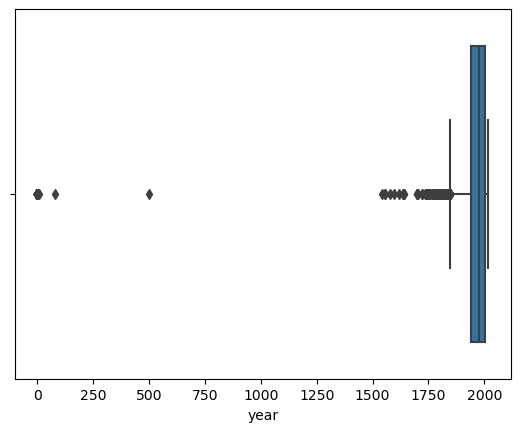

In [62]:
sns.boxplot(data = df, x= 'year')

With this graph we see that the majority of relevant information is classified between 1900-2000, but there is also a lot of outlier information from 1750 to the year 0

<Axes: xlabel='age'>

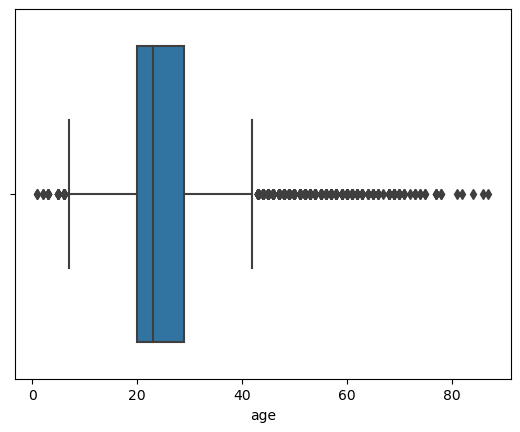

In [63]:
sns.boxplot(data = df, x= 'age')

Here we can see that the age where there are most attacks is approximately 20 to 35. but there is also a lot of outlier information from the 40s to the 80s.

## Plotting

<Axes: xlabel='fatal_(y/n)', ylabel='count'>

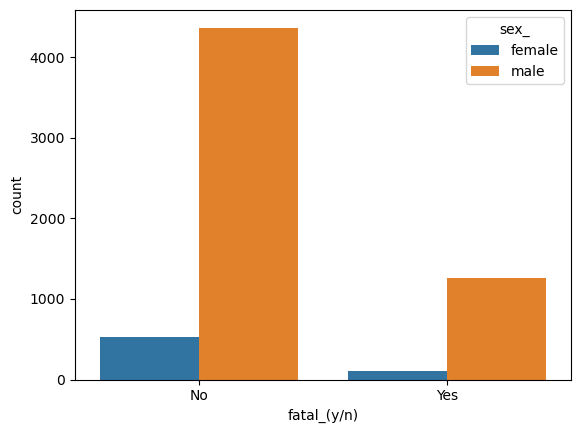

In [64]:
sns.countplot(data = df, x = 'fatal_(y/n)', hue= 'sex_')

Here we can see that there is a greater fatality and attacks in the male gender than in the female gender.

<Axes: xlabel='fatal_(y/n)', ylabel='count'>

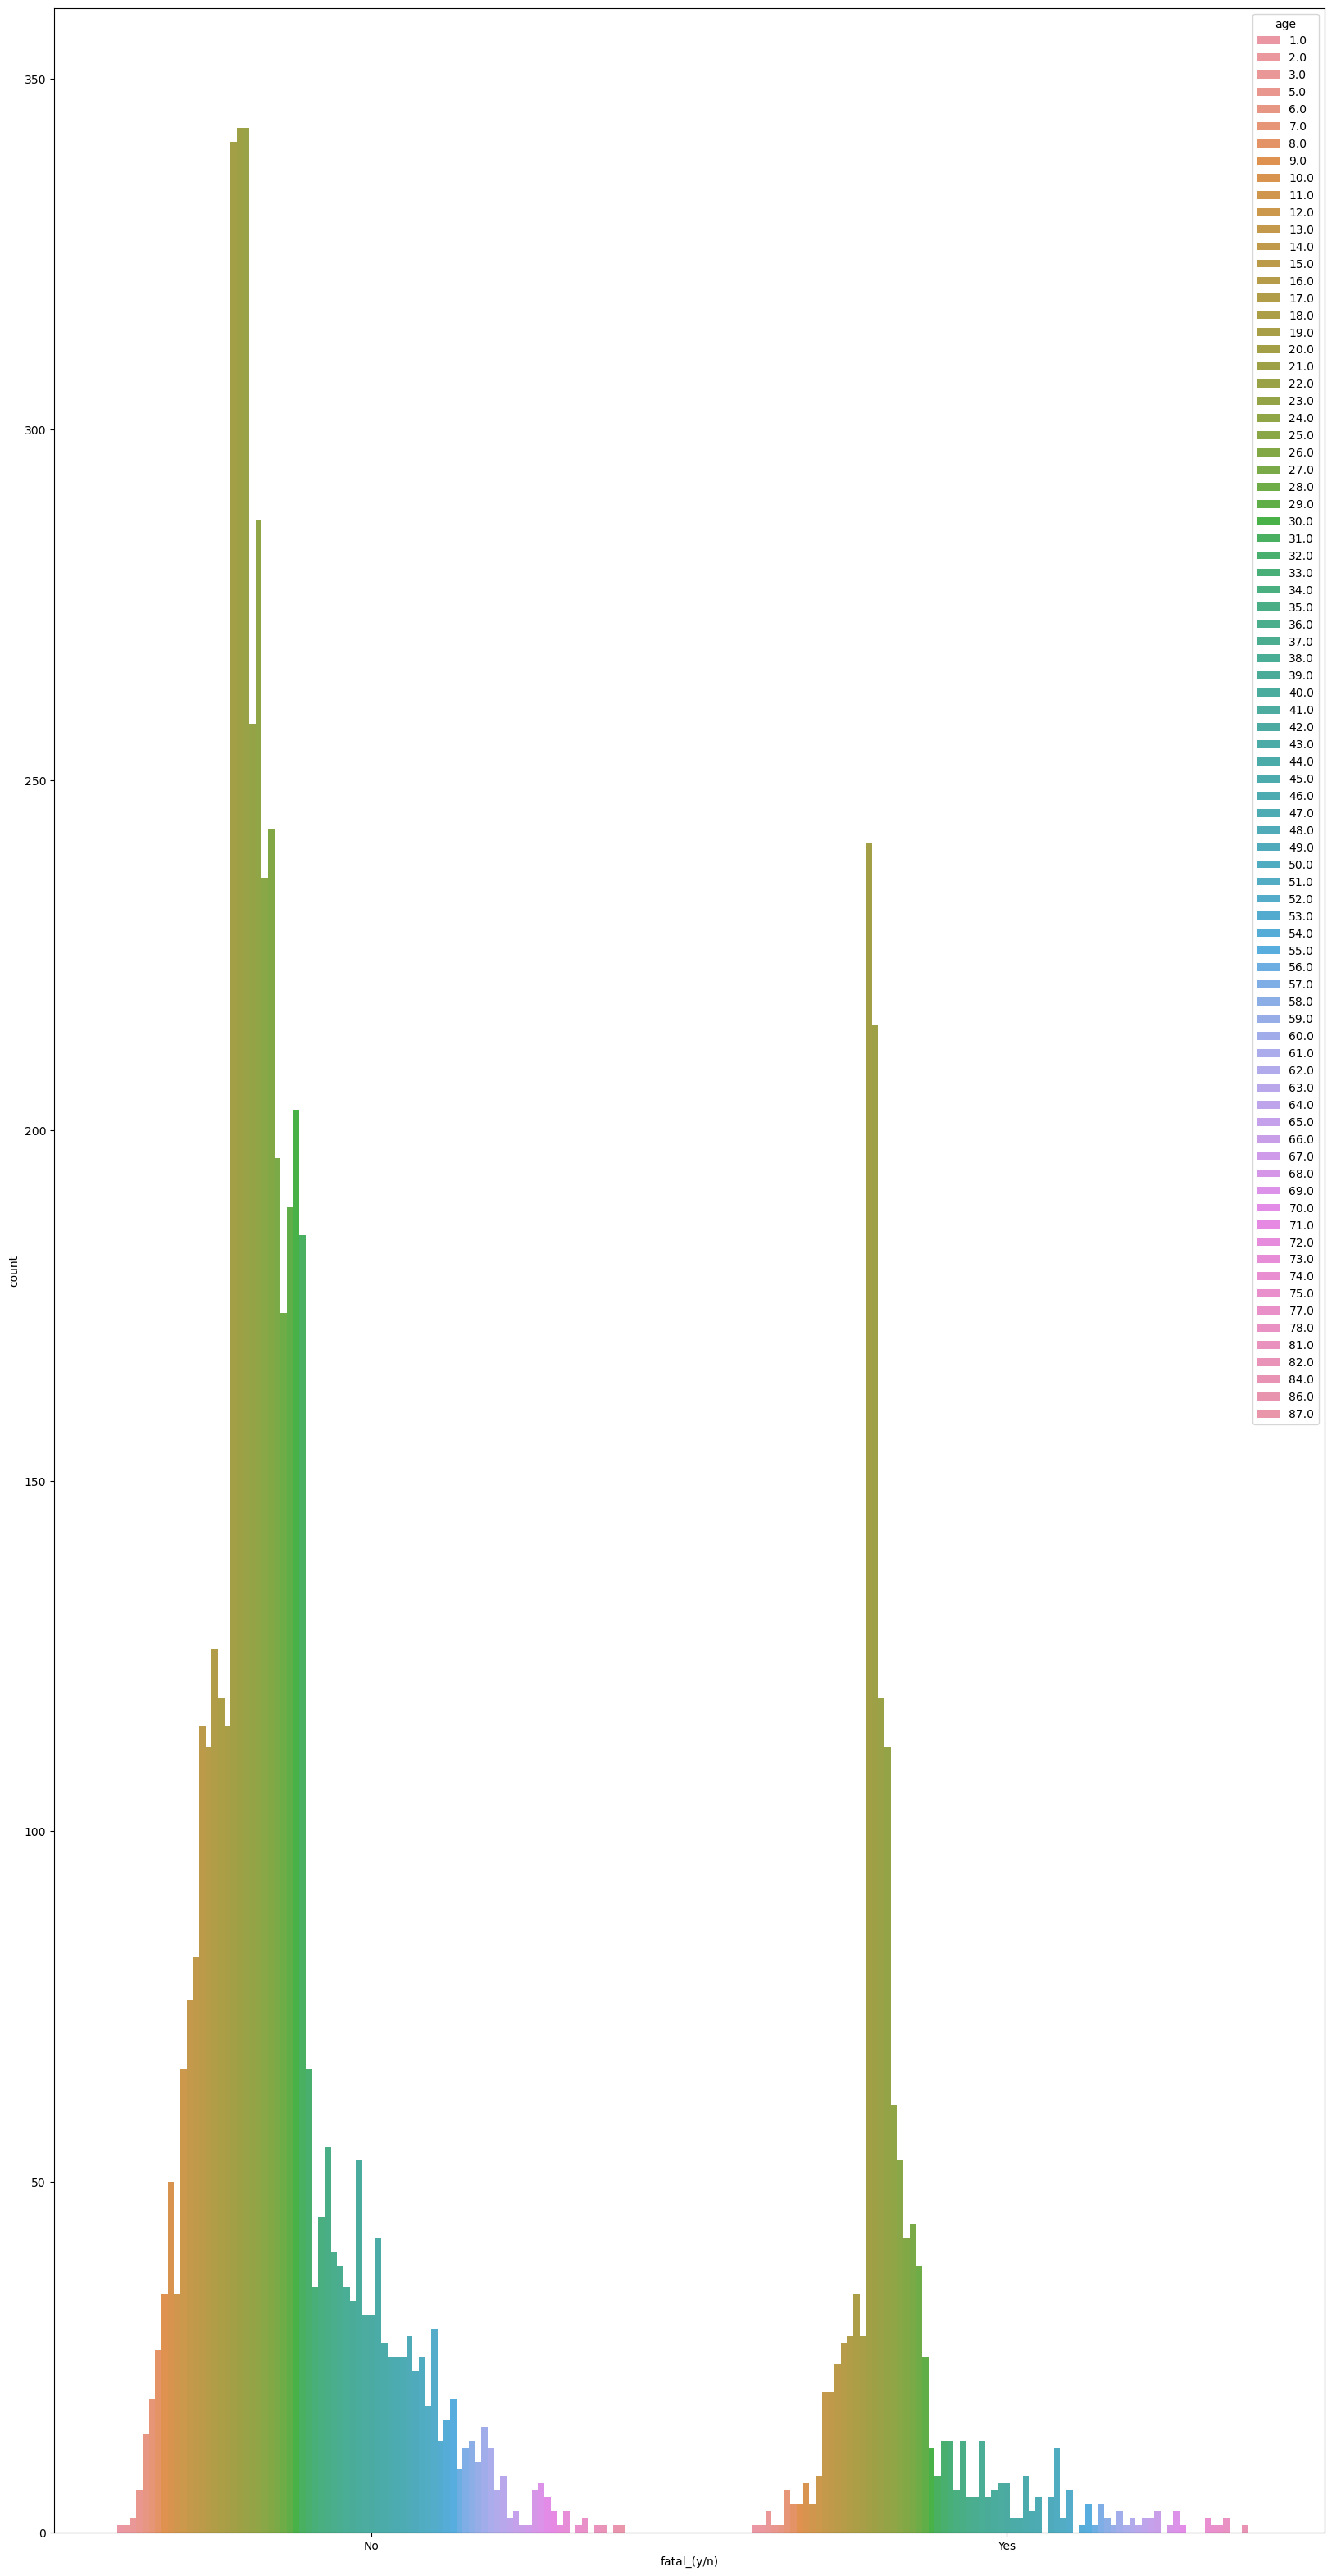

In [65]:
plt.figure(figsize=(20,40))
sns.countplot(data = df, x = 'fatal_(y/n)', hue= 'age')

<Axes: xlabel='age', ylabel='count'>

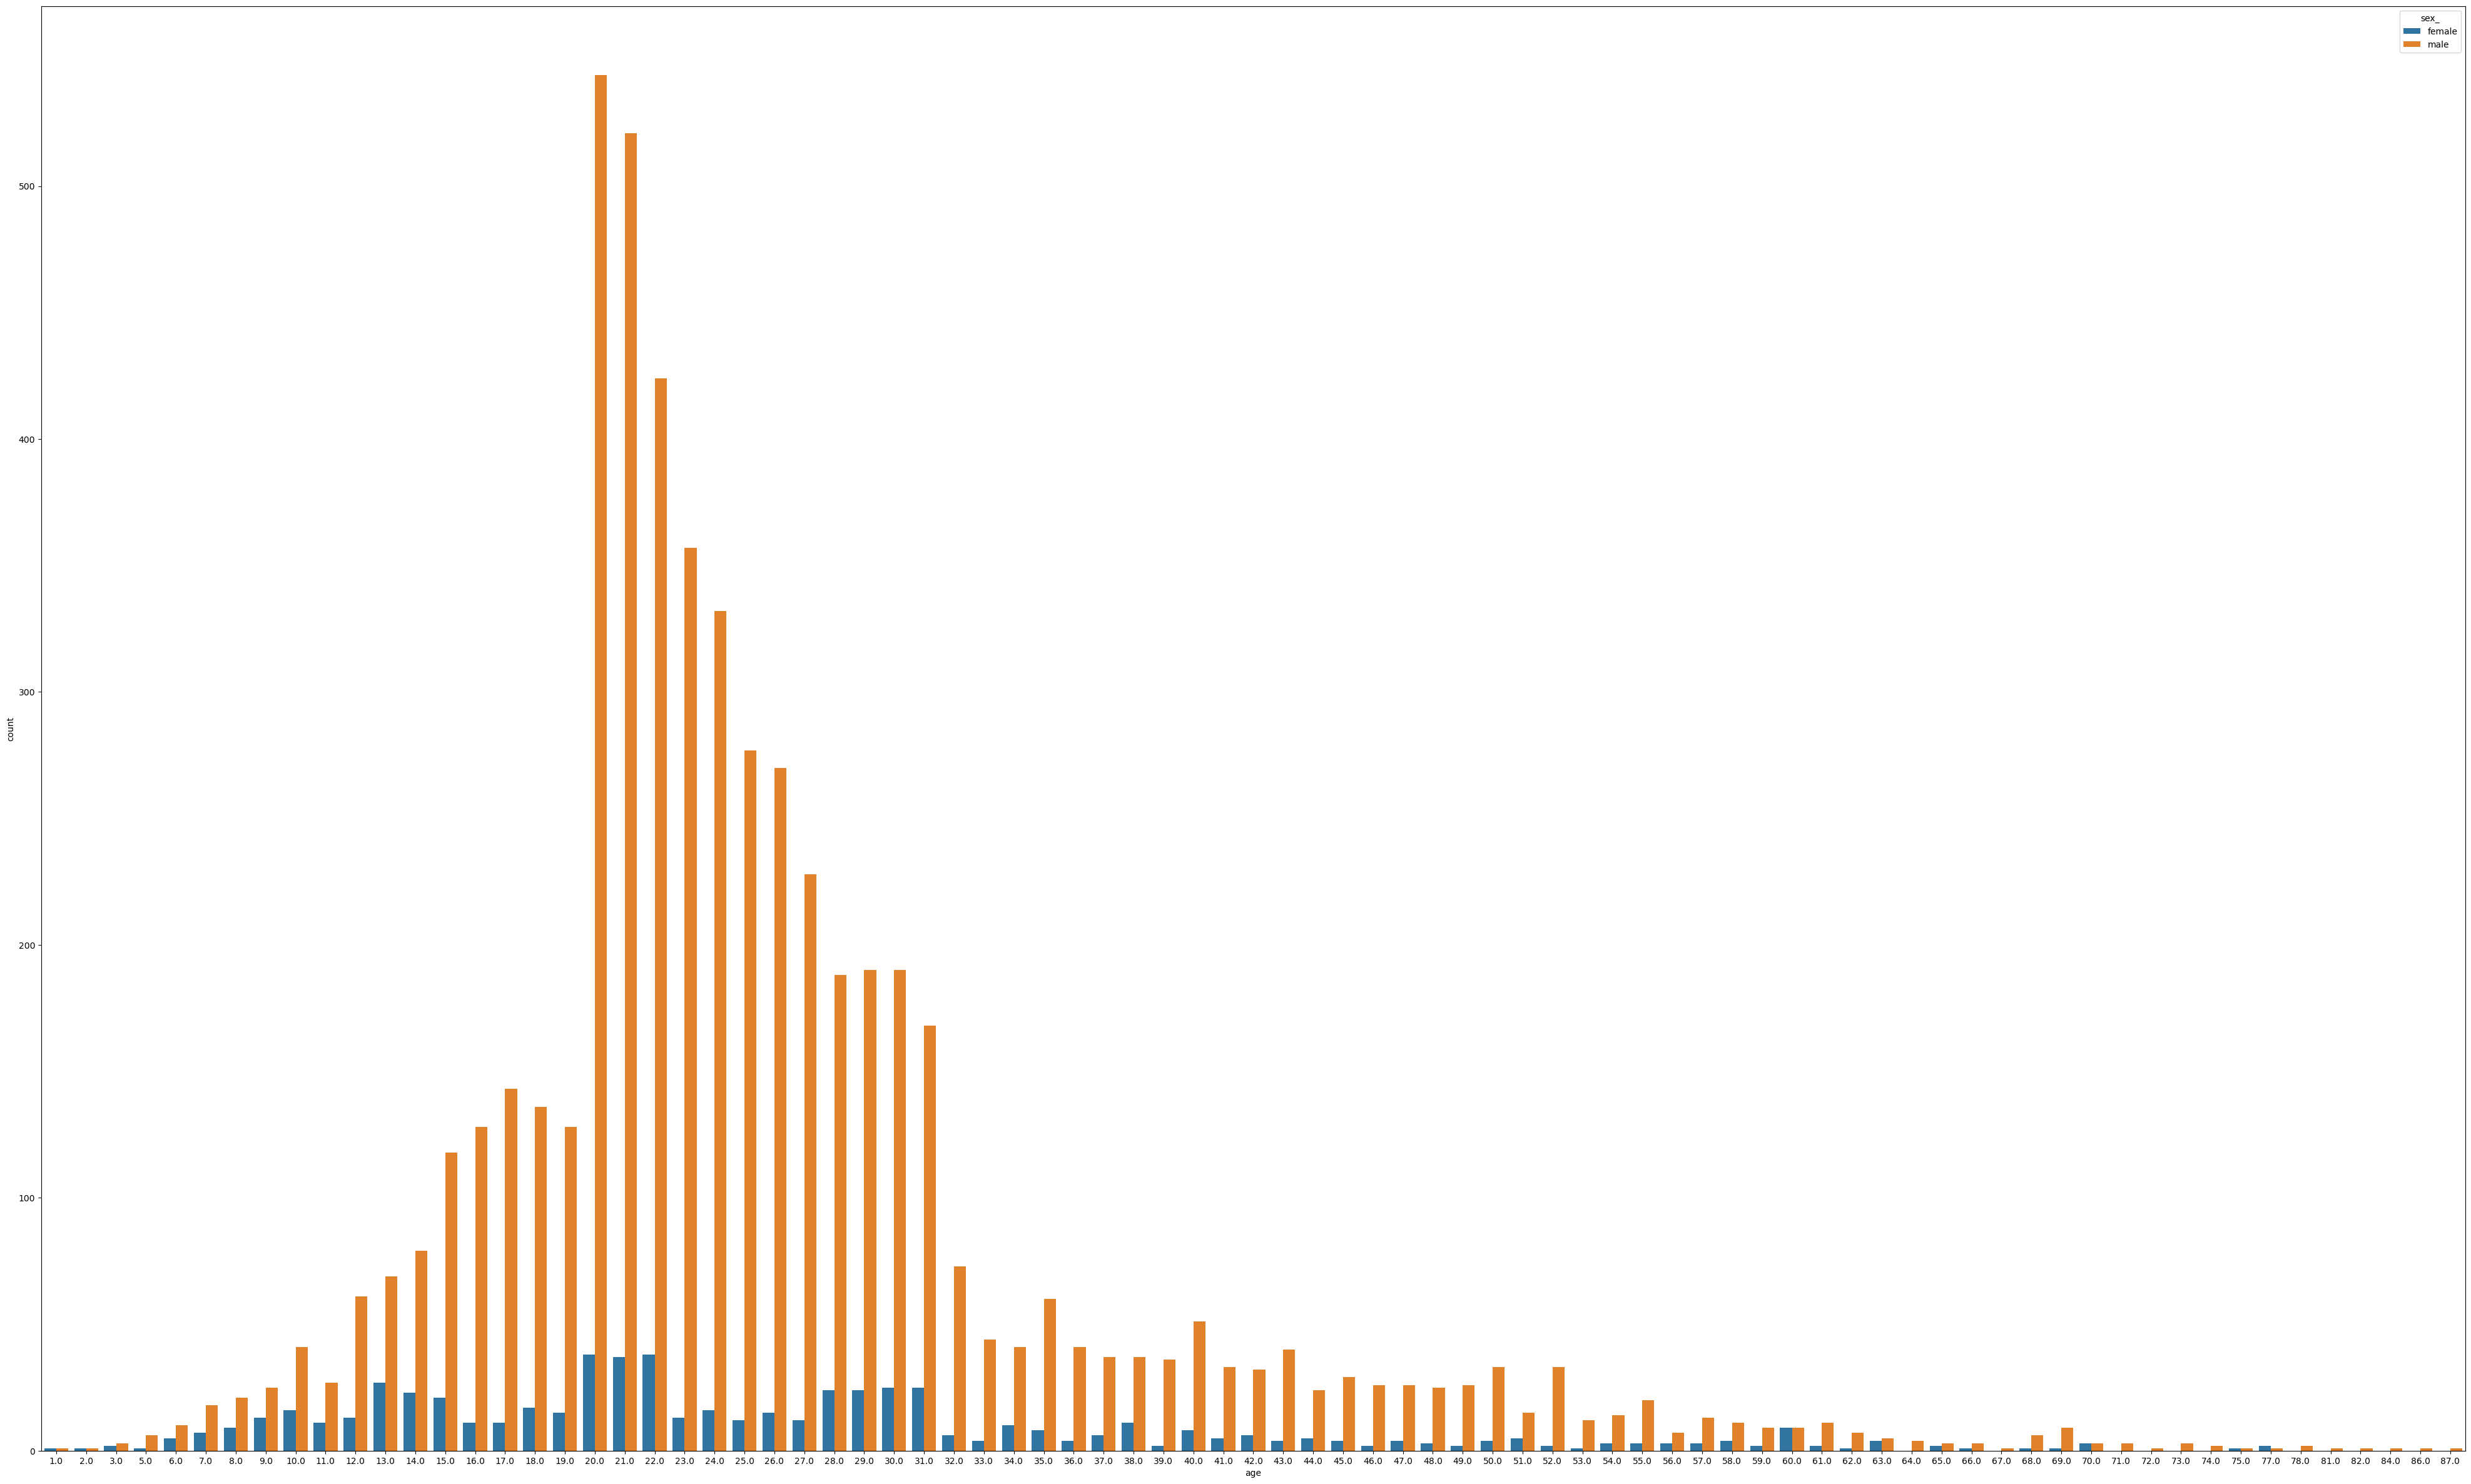

In [66]:
plt.figure(figsize=(50,30))
sns.countplot(data = df, x = 'age', hue= 'sex_')

Here we can see, as I have previously commented, that there is a greater fatality in men and from 20 to 30 years

<Axes: xlabel='fatal_(y/n)', ylabel='count'>

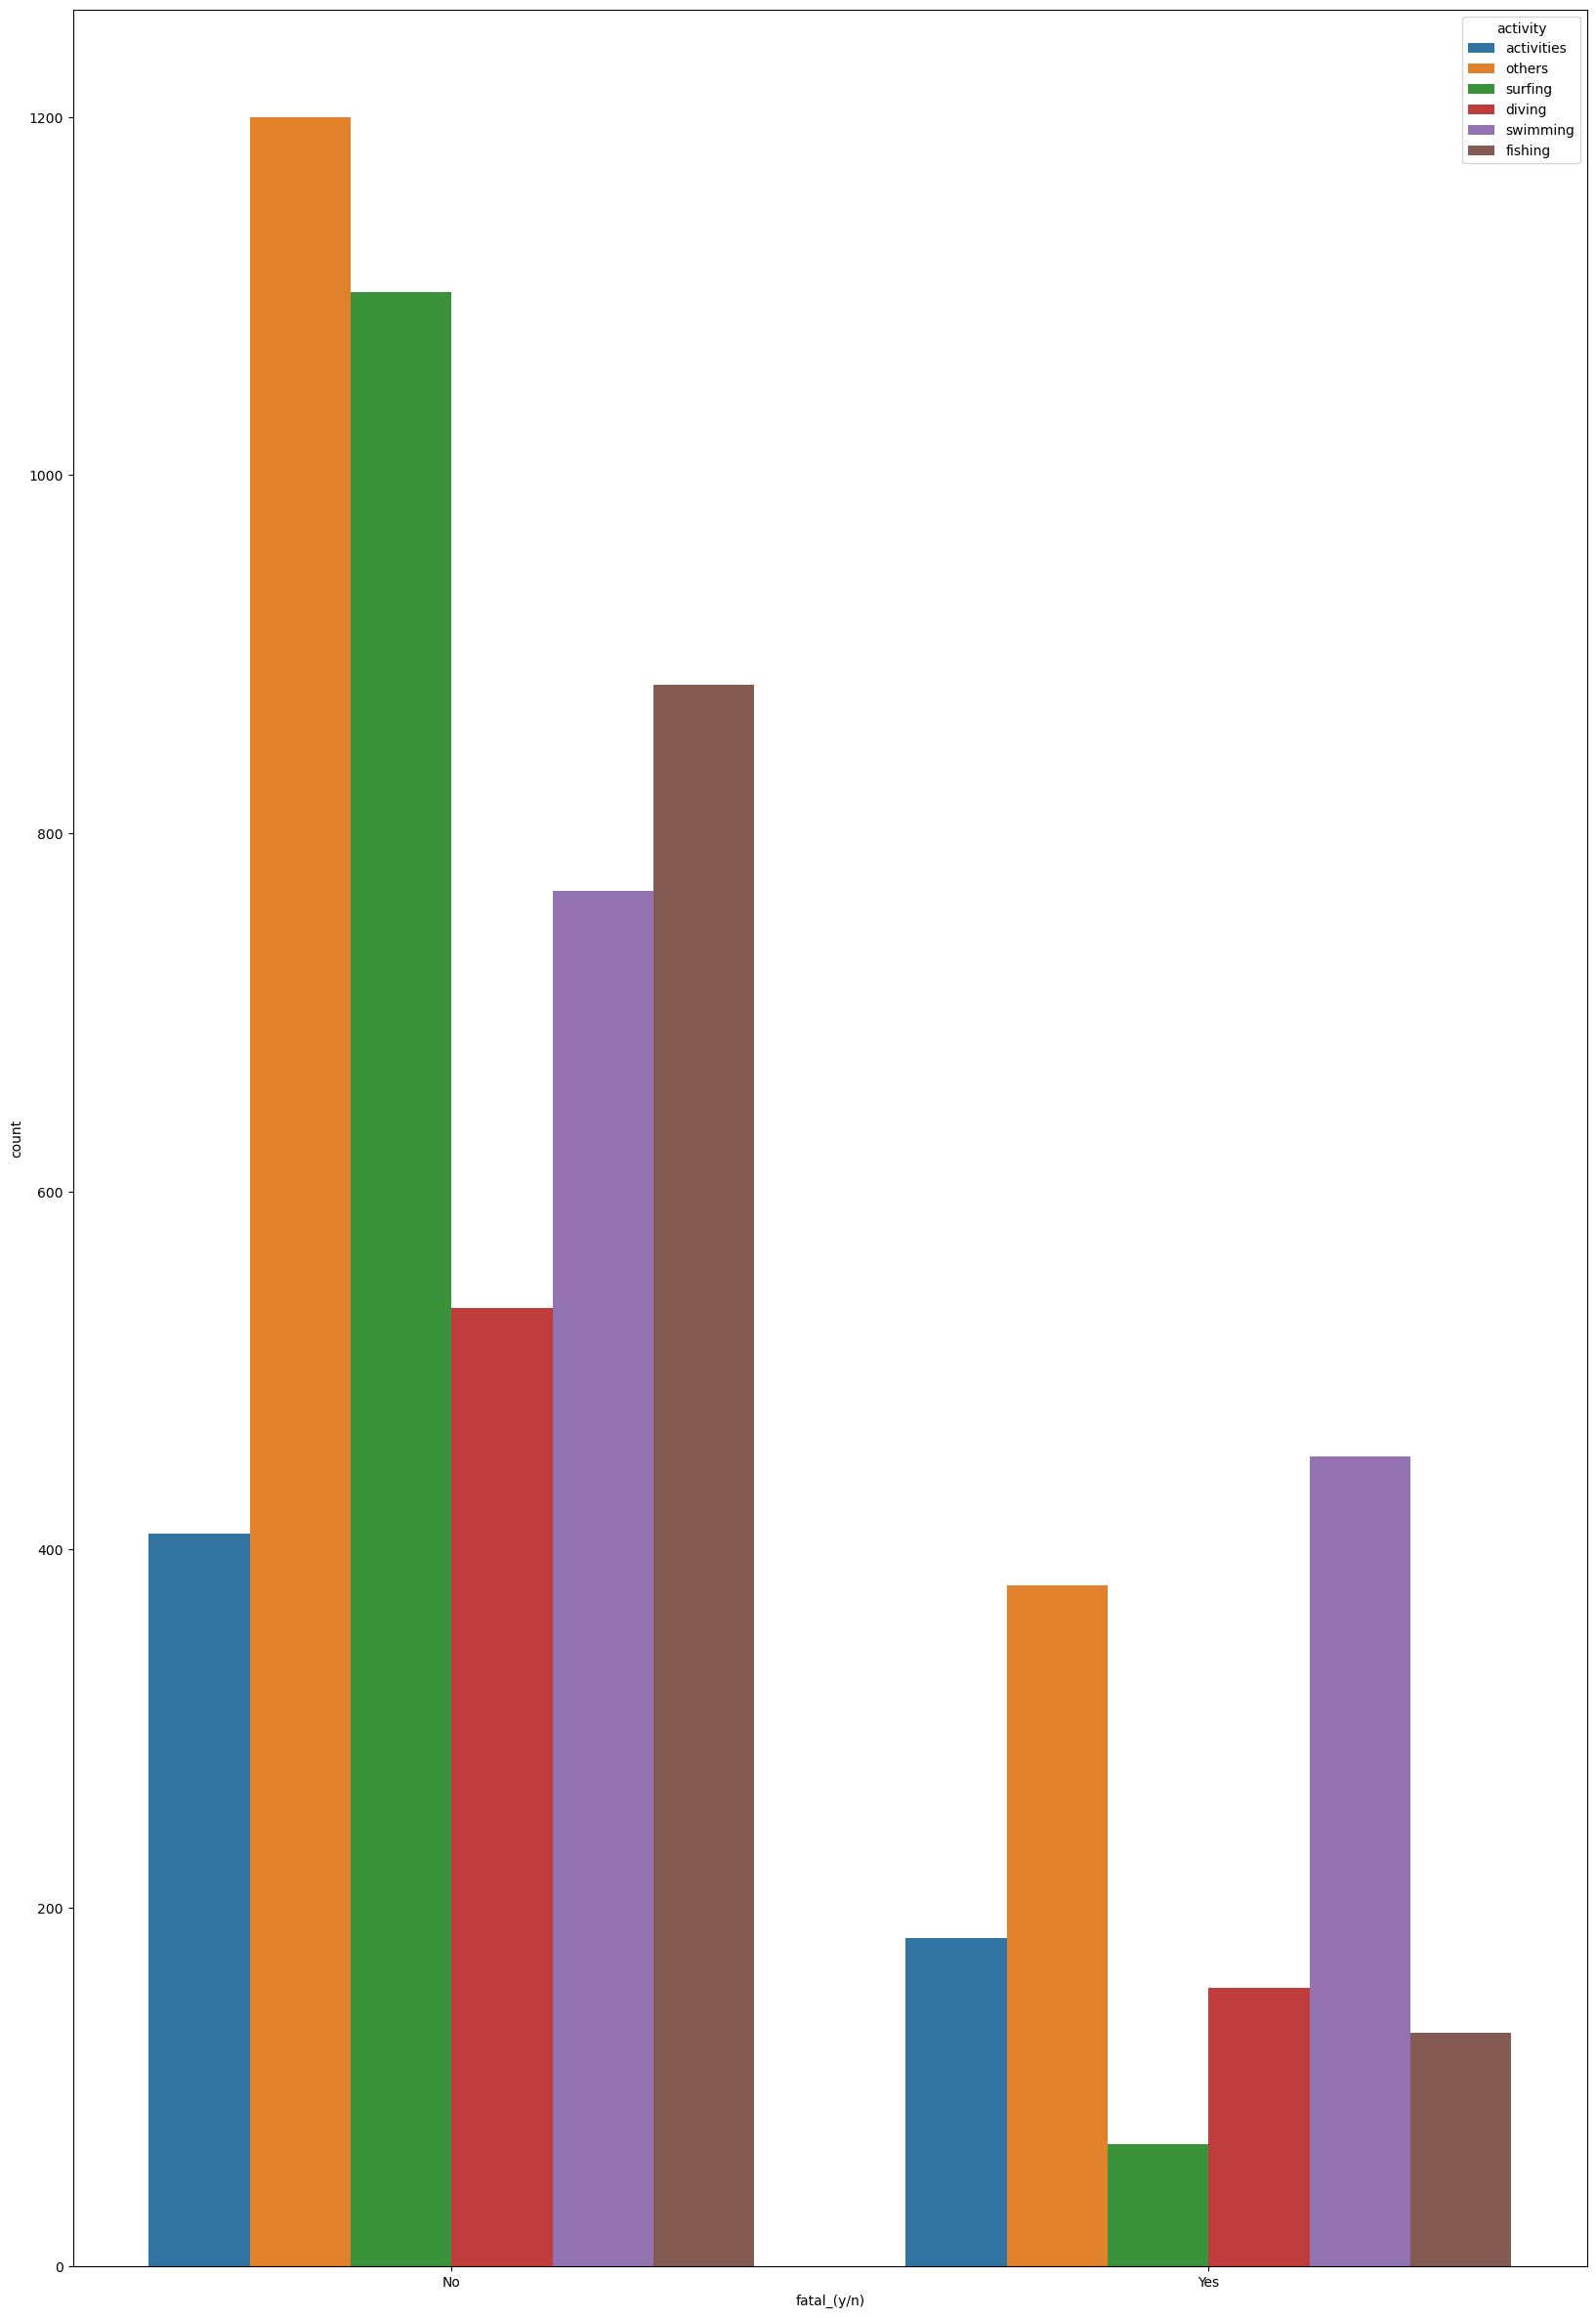

In [67]:
plt.figure(figsize=(20,30))
sns.countplot(data = df, x = 'fatal_(y/n)', hue= 'activity')

The most relevant activities with the highest fatality in order are the following: firstly, with respect to the relationship of the activity with the probability of an attack, it is the activity of swimming, others (which includes walking, playing on the beach, etc), followed by activities, diving, fishing and the one with the lowest risk, although it may seem surprising, is surfing, that is, the least dangerous activity, according to analysis where the least shark attacks occur, is surfing.

<Axes: xlabel='fatal_(y/n)', ylabel='count'>

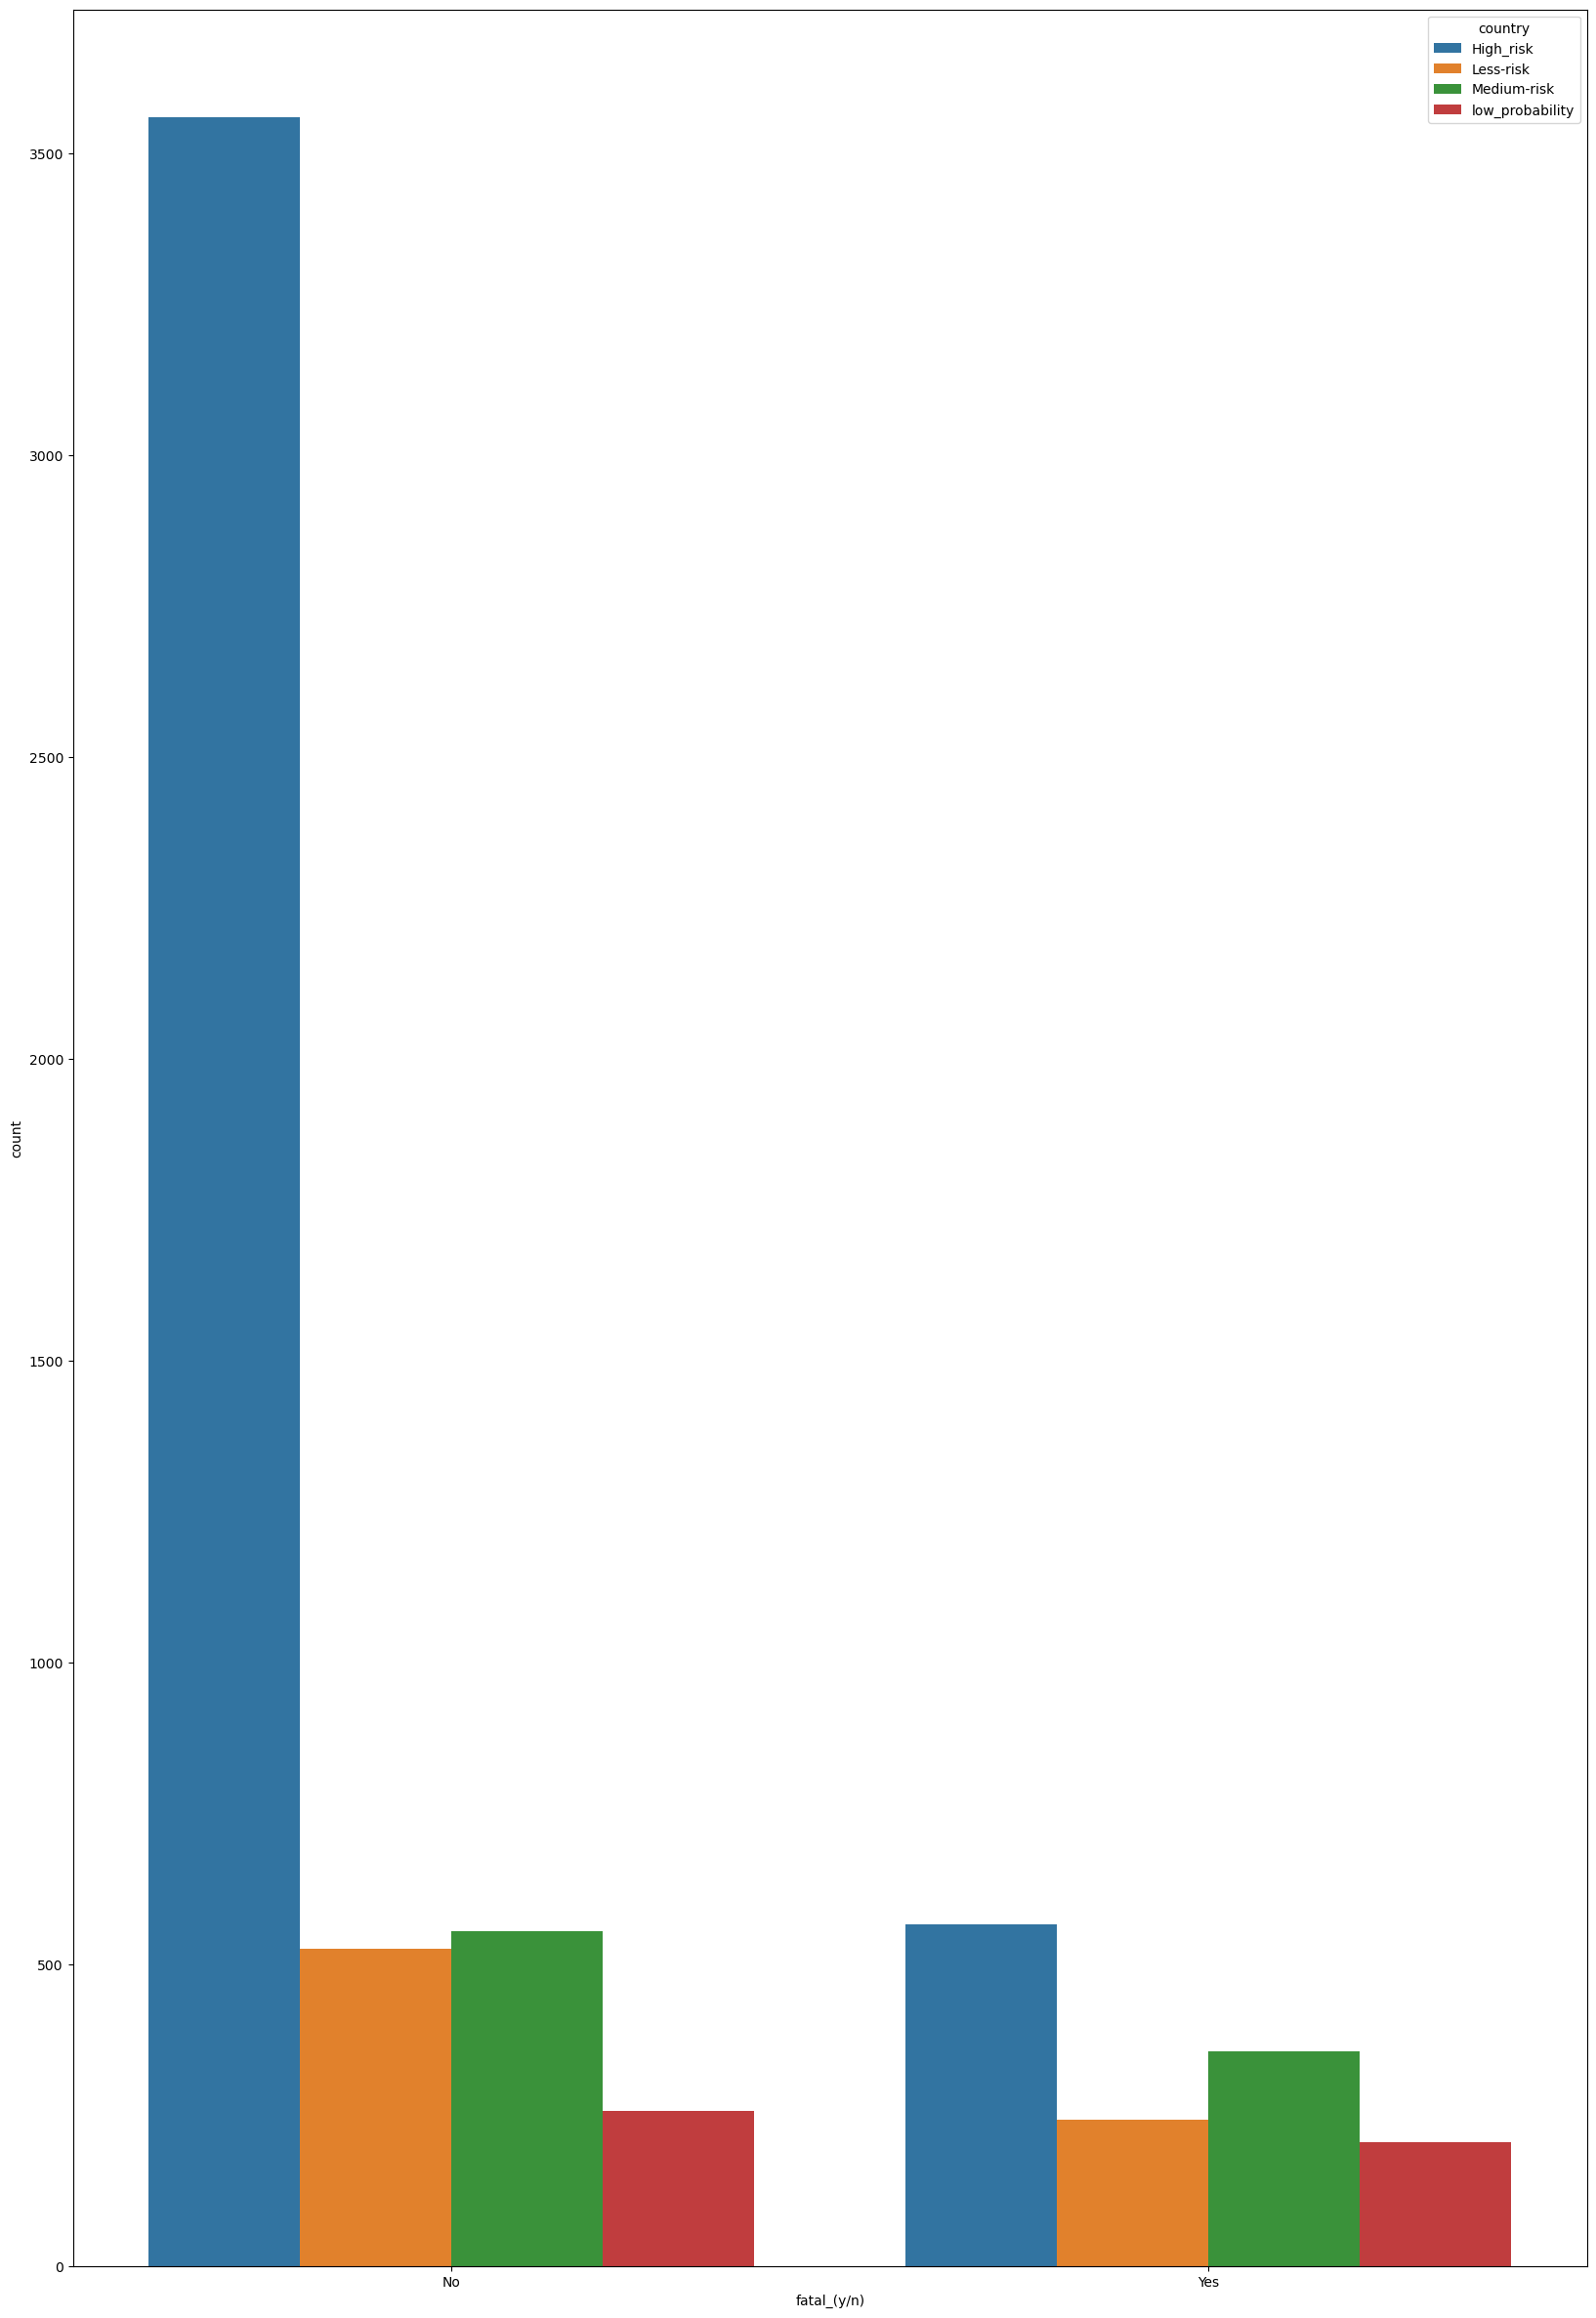

In [68]:
plt.figure(figsize=(20,30))
sns.countplot(data = df, x = 'fatal_(y/n)', hue= 'country')

Here we can see that indeed, in the graph the fatal attacks occur in the highest risk cities, then those with medium risk, followed by low risk and finally, low probability, as expected.

<Axes: xlabel='fatal_(y/n)', ylabel='count'>

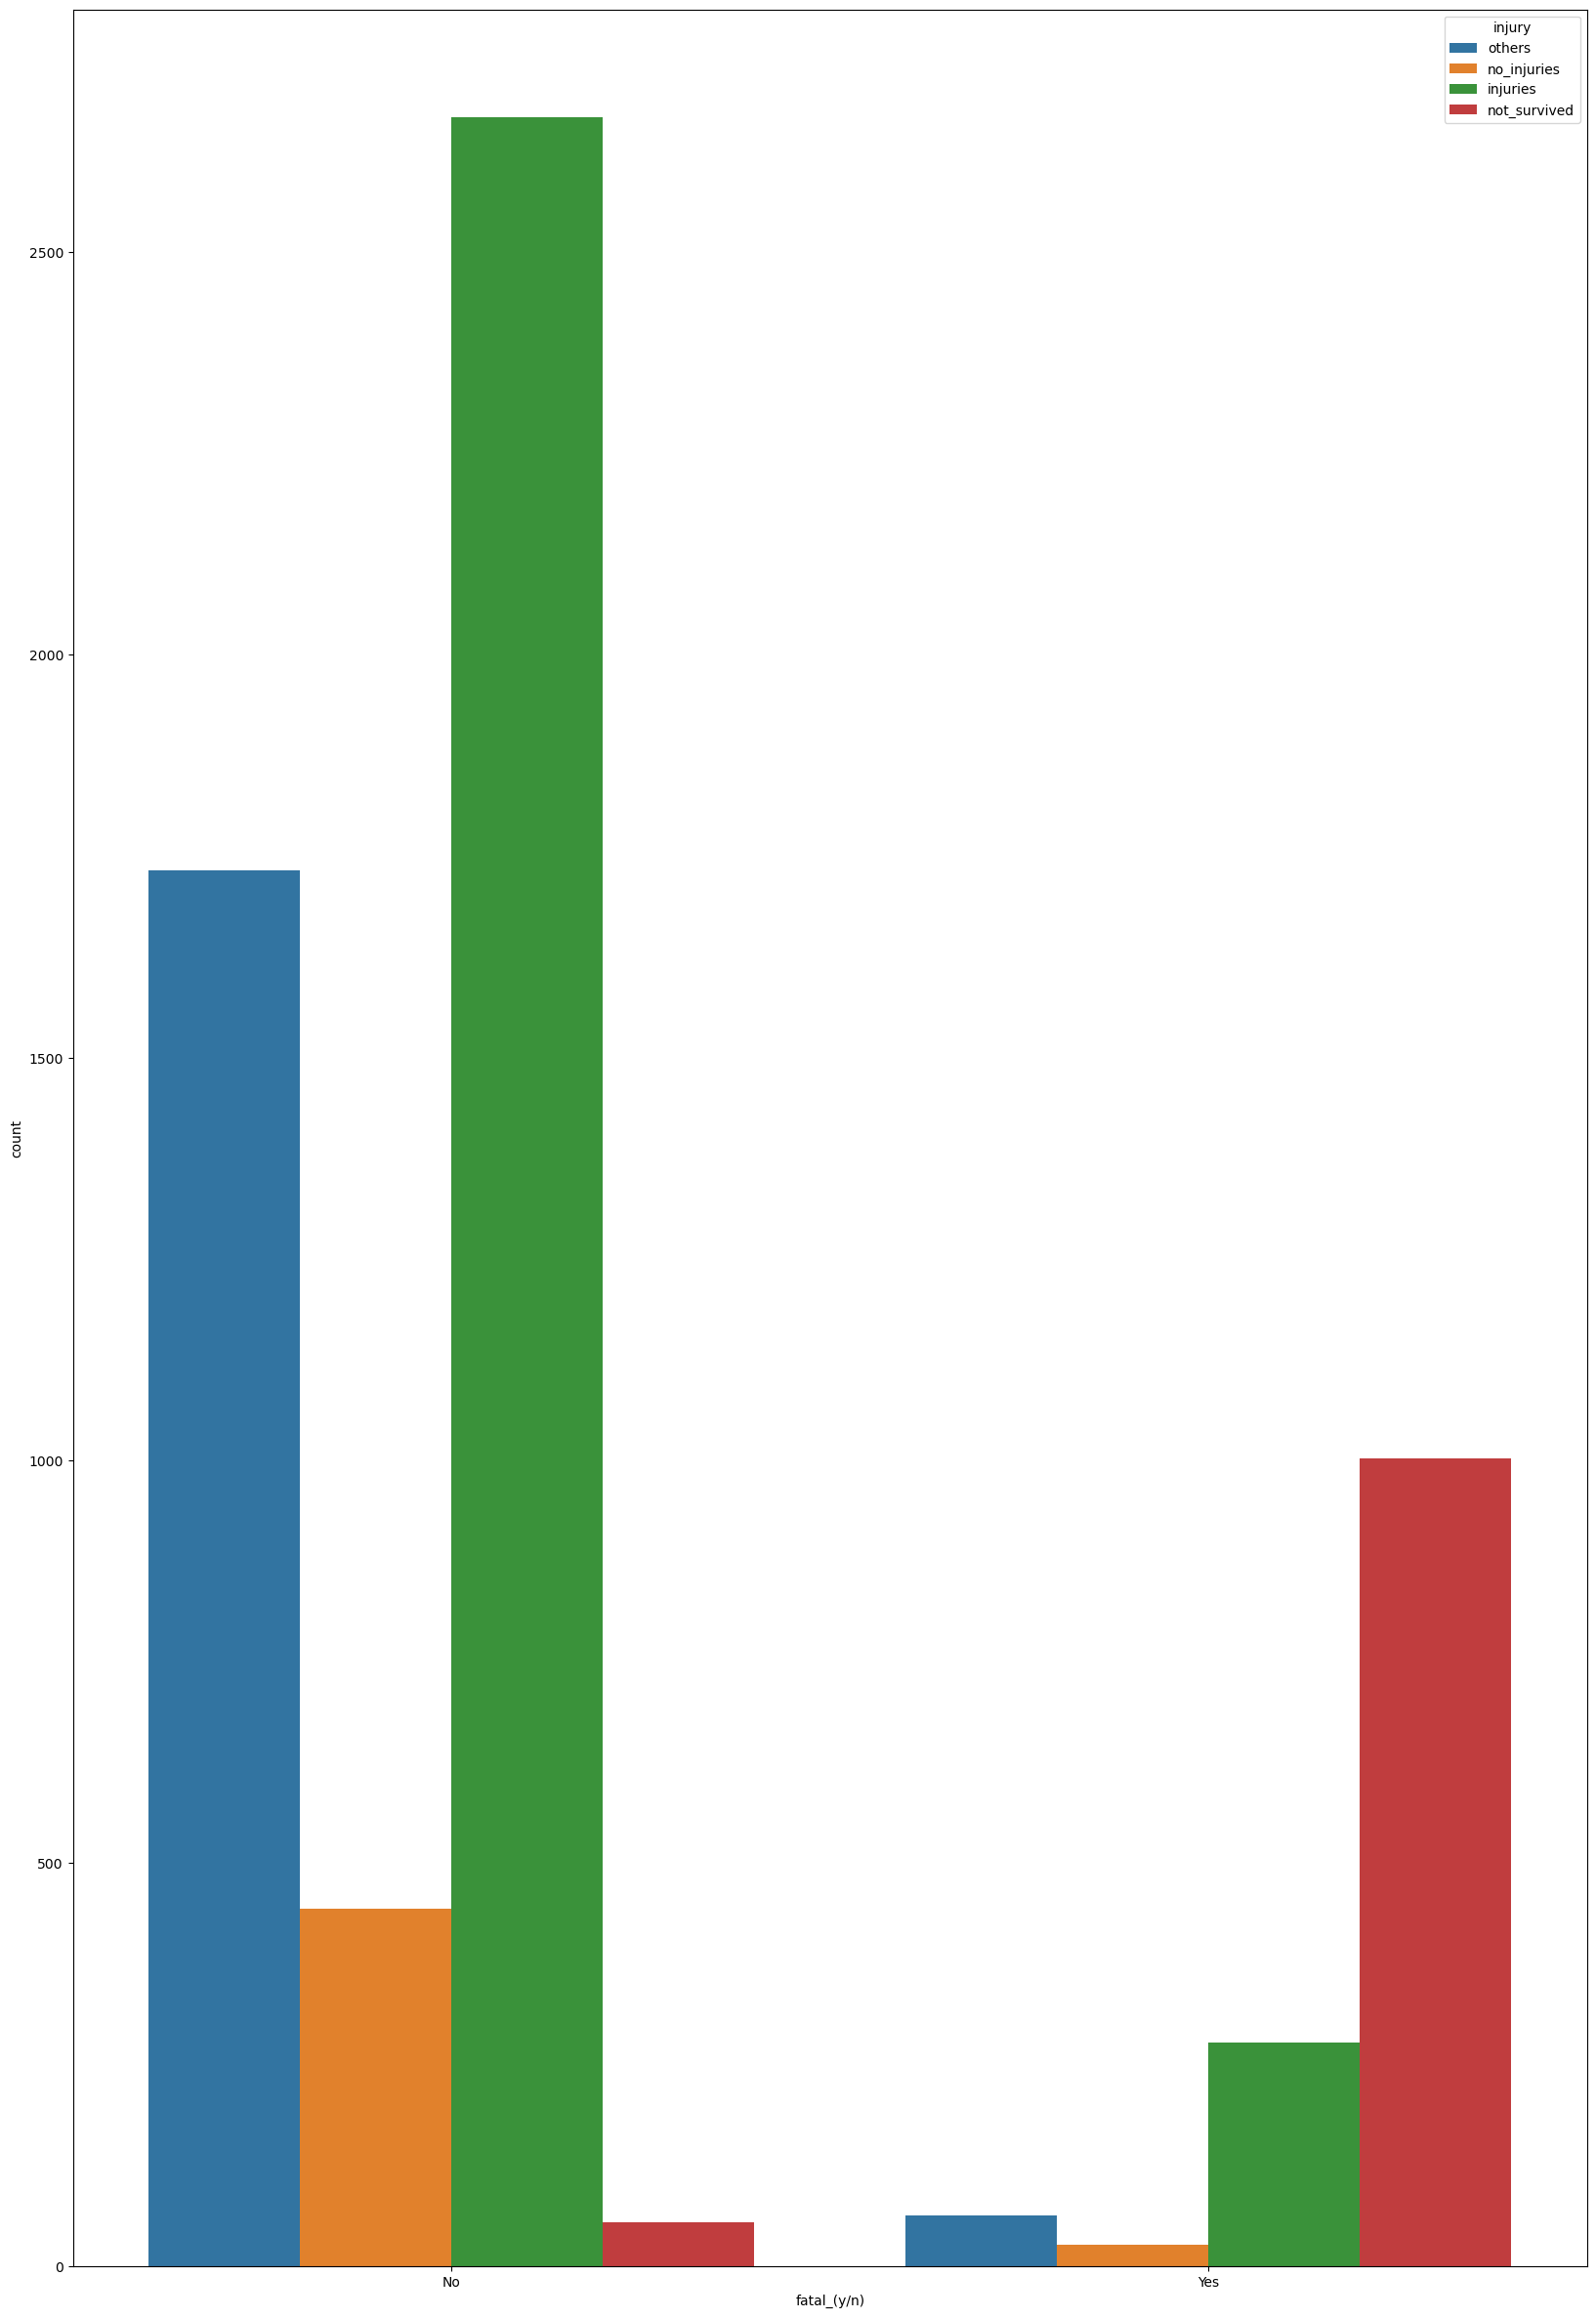

In [69]:
plt.figure(figsize=(20,30))
sns.countplot(data = df, x = 'fatal_(y/n)', hue= 'injury')

ignoring the obviously non-surviving attacks, and those who have not been injured, there are mostly injuries.

<Axes: xlabel='fatal_(y/n)', ylabel='count'>

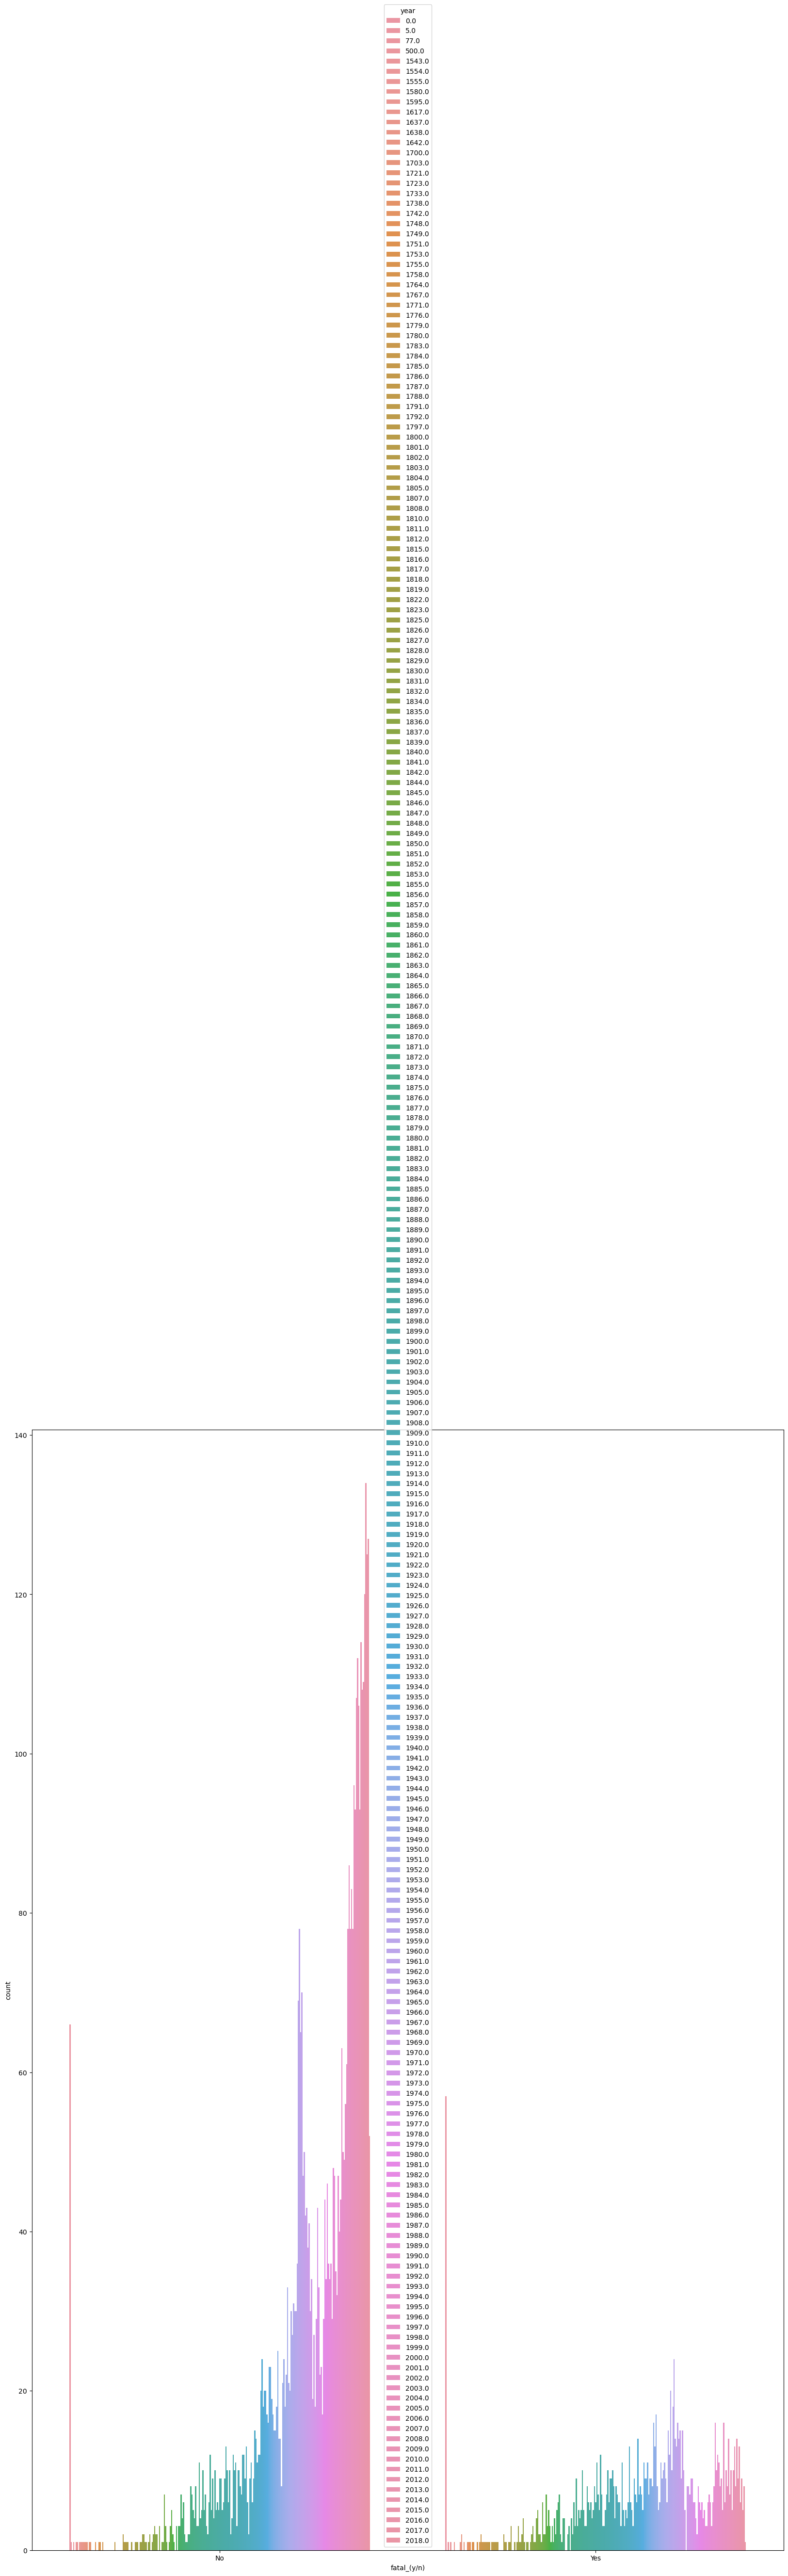

In [70]:
plt.figure(figsize=(20,30))
sns.countplot(data = df, x = 'fatal_(y/n)', hue= 'year')

There is an appreciable increase, since the 1960s and 1970s, and from the 2000s onwards.

## Encoding Categorical Variables

I make a copy of the document call df1

In [71]:
df1 = df.copy()

In [72]:
cat_df = df1.select_dtypes("object")
display(cat_df.head())

type    country    activity    sex_       injury fatal_(y/n)
0     boating  High_risk  activities  female       others          No
1  unprovoked  High_risk      others  female       others          No
2      others  High_risk     surfing    male  no_injuries          No
3  unprovoked  High_risk     surfing    male       others          No
4    provoked  Less-risk      diving    male     injuries          No

We separate the columns that correspond to the categorical columns and the numerical columns.

In [73]:
num_df = df.select_dtypes("number")
display(num_df.head())

year   age
0  2018.0  57.0
1  2018.0  11.0
2  2018.0  48.0
3  2018.0  32.0
4  2018.0  32.0

In [74]:
encoder = OneHotEncoder()
encoder.fit(cat_df)

OneHotEncoder()

In [75]:
matrix = encoder.transform(cat_df).todense()
matrix.shape

(6265, 23)

In [76]:
encoder.categories_[:][:]

[array(['boating', 'others', 'provoked', 'sea_disaster', 'unprovoked'],
       dtype=object),
 array(['High_risk', 'Less-risk', 'Medium-risk', 'low_probability'],
       dtype=object),
 array(['activities', 'diving', 'fishing', 'others', 'surfing', 'swimming'],
       dtype=object),
 array(['female', 'male'], dtype=object),
 array(['injuries', 'no_injuries', 'not_survived', 'others'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [77]:
columns= []

for i in range(len(encoder.categories_[:])):
    columns += list(encoder.categories_[i])[:]
    
print(columns)

['boating', 'others', 'provoked', 'sea_disaster', 'unprovoked', 'High_risk', 'Less-risk', 'Medium-risk', 'low_probability', 'activities', 'diving', 'fishing', 'others', 'surfing', 'swimming', 'female', 'male', 'injuries', 'no_injuries', 'not_survived', 'others', 'No', 'Yes']


In [78]:
cat_df = pd.DataFrame(matrix, columns=columns)
cat_df.shape

(6265, 23)

In [79]:
final_df = cat_df
final_df['year'] = num_df['year'].values
final_df['age'] = num_df['age'].values
final_df
final_df.isna().sum()

boating            0
others             0
provoked           0
sea_disaster       0
unprovoked         0
High_risk          0
Less-risk          0
Medium-risk        0
low_probability    0
activities         0
diving             0
fishing            0
others             0
surfing            0
swimming           0
female             0
male               0
injuries           0
no_injuries        0
not_survived       0
others             0
No                 0
Yes                0
year               0
age                0
dtype: int64

We check that all categories do not have any null value

In [80]:
final_df.to_csv("final_df_laura.csv")

We export the values that we have obtained in a csv document

## Correlations

In [81]:
matrix_corr = final_df.corr()

In [82]:
matrix_corr['Yes'].sort_values(ascending = False)

Yes                1.000000
not_survived       0.796146
sea_disaster       0.233591
swimming           0.181090
Medium-risk        0.171698
low_probability    0.153921
unprovoked         0.142841
Less-risk          0.087840
activities         0.070972
male               0.044117
others             0.031136
diving             0.005349
female            -0.044117
age               -0.072528
fishing           -0.095701
boating           -0.107629
no_injuries       -0.112178
year              -0.136919
provoked          -0.143571
others            -0.150312
surfing           -0.185864
High_risk         -0.273110
others            -0.281097
injuries          -0.283368
No                -1.000000
Name: Yes, dtype: float64

<Axes: >

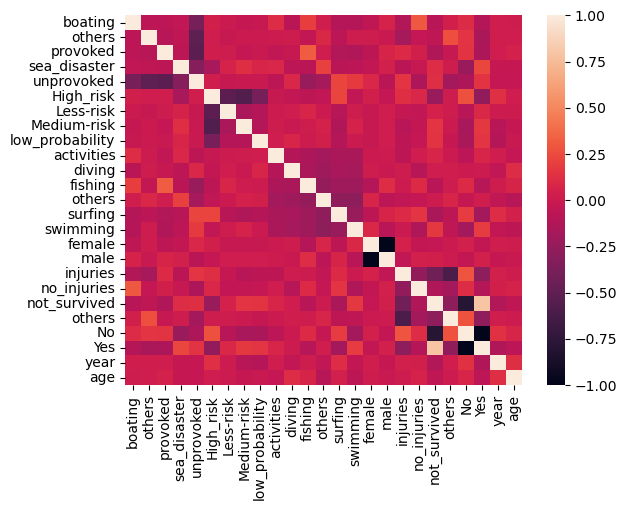

In [83]:
sns.heatmap(matrix_corr)

We correlate the matrix created with the data obtained through the Onehotencoder, in order to analyze all the categories created (in the encoder.categories_[:][:] section).

## Split

In [84]:
X = final_df.drop(['Yes', 'No', 'not_survived'], axis=1)
y = final_df['Yes']

In [85]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.25, random_state = 95)

In [86]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [87]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train_scaler

array([[-0.24006603, -0.31004342, -0.31822291, ..., -0.63137195,
         0.08754889, -0.26599476],
       [-0.24006603, -0.31004342, -0.31822291, ..., -0.63137195,
         0.26870209,  1.86571164],
       [-0.24006603, -0.31004342, -0.31822291, ...,  1.58385242,
         0.30855579,  0.47546834],
       ...,
       [-0.24006603, -0.31004342, -0.31822291, ..., -0.63137195,
        -0.40518779, -0.54404342],
       [-0.24006603, -0.31004342, -0.31822291, ..., -0.63137195,
        -6.98829486, -0.54404342],
       [-0.24006603,  3.22535465, -0.31822291, ...,  1.58385242,
         0.13102566, -1.84160383]])

Now we are going to scale the data to be able to predict future values and see if the machine has learned to make the predictions and if it has learned to read the database correctly.

## Training Model

In [88]:
clasification = LogisticRegression(random_state = 95)
clasification.fit(X_train_scaler, y_train)

LogisticRegression(random_state=95)

In [89]:
predictions = clasification.predict(X_test_scaler)
predictions

array([0., 0., 1., ..., 0., 0., 0.])

In [90]:
y_test.value_counts()

0.0    1240
1.0     327
Name: Yes, dtype: int64

In [91]:
predictions_ = clasification.predict_proba(X_test_scaler)
predictions_

array([[0.98022793, 0.01977207],
       [0.73616514, 0.26383486],
       [0.00568153, 0.99431847],
       ...,
       [0.99050589, 0.00949411],
       [0.97792242, 0.02207758],
       [0.7730676 , 0.2269324 ]])

In [92]:
cm = confusion_matrix(y_test, predictions)
cm

array([[1231,    9],
       [  90,  237]], dtype=int64)

<Axes: >

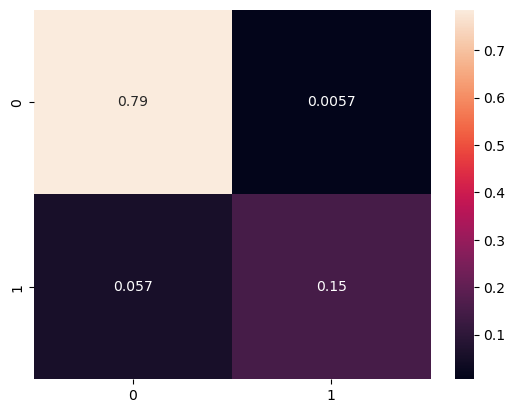

In [93]:
cf_matrix = confusion_matrix(y_test, predictions, normalize = 'all')
sns.heatmap(cf_matrix, annot = True)